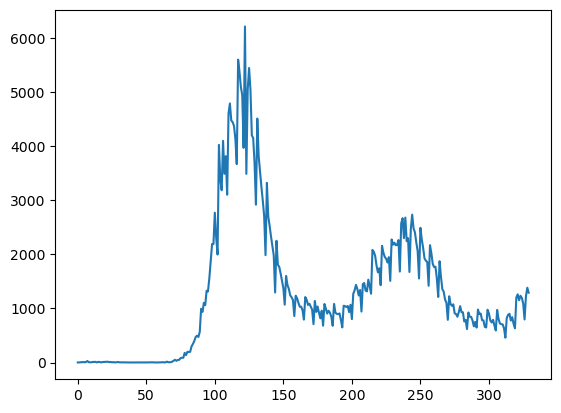

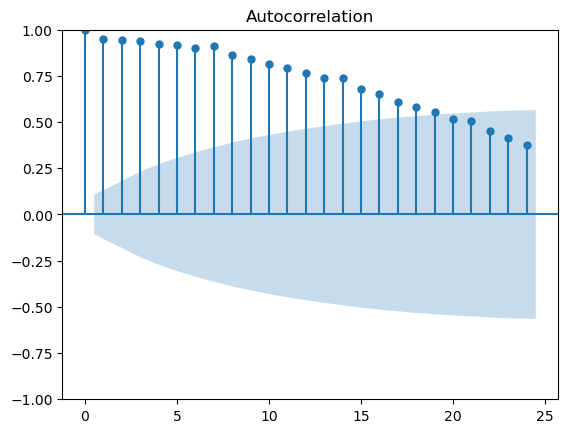

D:\88690\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


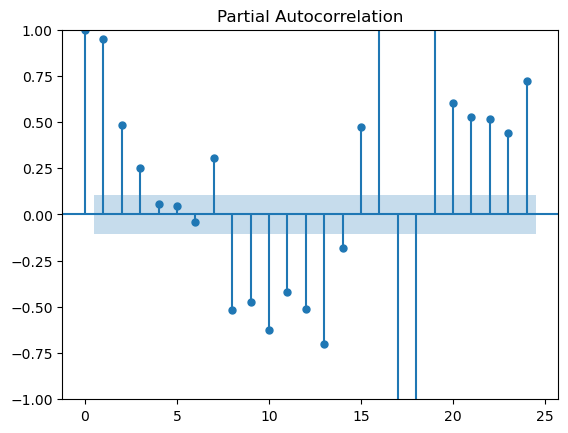

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# LSTM with regression framing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from keras import optimizers
dataset = pandas.read_csv(r'各縣市每日確診資料\彰化縣每日確診數.csv', usecols=[2], engine='python', skipfooter=3,encoding='utf-8')
plt.plot(dataset)
plt.savefig('Changhua.png')
plt.show()

# 畫出 ACF 12 期的效應
sm.graphics.tsa.plot_acf(dataset, lags=24)
plt.savefig('Changhua_acf_24.png')
plt.show()
# 畫出 PACF 12 期的效應
sm.graphics.tsa.plot_pacf(dataset, lags=24)
plt.savefig('Changhua_pacf_24.png')
plt.show()

In [2]:
# 產生 (X, Y) 資料集, Y 是下一期的感染人數
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

# 載入訓練資料
dataframe = read_csv(r'各縣市每日確診資料\彰化縣每日確診數.csv', usecols=[2], engine='python', skipfooter=0,encoding='utf-8')
dataframe=dataframe.drop(dataframe[dataframe['確定病例數']==0].index,axis=0)
print(dataframe)
#plt.plot(dataframe)

dataset = dataframe.values
print(len(dataset))
#dataset=np.delete(dataset,[0,768],axis=0)

# 正規化(normalize) 資料，使資料值介於[0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

     確定病例數
0        1
1        2
2        1
3        6
4        9
..     ...
326    797
327   1224
328   1384
329   1293
330   1121

[331 rows x 1 columns]
331


## RNN結合LSTM架構

### Model1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1, 64)             4224      
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,313
Trainable params: 37,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
30/30 [==============================] - 4s 33ms/step - loss: 0.0779 - mse: 0.0779 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2/5000
30/30 [==============================] - 0s 12ms/step - loss: 0.0504 - mse: 0.0504 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 3/5000
30/30 [==============================

30/30 [==============================] - 0s 12ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 57/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 58/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0151 - mse: 0.0151 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 59/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 60/5000
30/30 [==============================] - 0s 15ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 61/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 62/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 63/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.013

30/30 [==============================] - 0s 9ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 118/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 119/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 120/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 121/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 122/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 123/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 124/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 6ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 179/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 180/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 181/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 182/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 183/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 184/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 185/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 9ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 240/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 241/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 242/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 243/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 245/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 246/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 301/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 302/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 303/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 304/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 305/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 306/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 307/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 362/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 363/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 364/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 365/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 366/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 367/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 368/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 9ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 423/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 424/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 425/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 426/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 427/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 428/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 429/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 484/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 485/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 486/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 487/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 488/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 489/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 490/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 545/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 546/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 547/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 548/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 549/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 550/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 551/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 606/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 607/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 608/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 609/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 610/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 611/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 612/5000
30/30 [==============================] - 0s 7ms/step - loss: 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 667/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 668/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 669/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 670/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 671/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 672/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 673/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 728/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 729/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 730/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 731/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 732/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 733/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 734/5000
30/30 [==============================] - 0s 6ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 789/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 790/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 791/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 792/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 793/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 794/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 795/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 850/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 851/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 852/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 853/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 854/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 855/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 856/5000
30/30 [==============================] - 0s 7ms/step - loss:

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 911/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 912/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 913/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 914/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 915/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 916/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 917/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 972/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 973/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 974/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 975/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 976/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 977/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 978/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

Epoch 1032/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1033/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1034/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1035/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1036/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1037/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1038/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1039/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1093/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1094/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1095/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1096/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1097/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1098/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1099/5000
30/30 [==============================] - 0s 6ms/step - 

Epoch 1153/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1154/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1155/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1156/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1157/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1158/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1159/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1160/5000
30/30 [==============================] 

30/30 [==============================] - 0s 9ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1214/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1215/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1216/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1217/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1218/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1219/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1220/5000
30/30 [==============================] - 0s 7ms/step -

Epoch 1274/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1275/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1276/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1277/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1278/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1279/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1280/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1281/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1335/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1336/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1337/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1338/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1339/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1340/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1341/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1395/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1396/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1397/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1398/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1399/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1400/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1401/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1402/5000
30/30 [==============================]

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1456/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1457/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1458/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1459/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1460/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1461/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1462/5000
30/30 [==============================] - 0s 9ms/step - 

Epoch 1516/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1517/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1518/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1519/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1520/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1521/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1522/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1523/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1577/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1578/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1579/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1580/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1581/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1582/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1583/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1637/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1638/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1639/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1640/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1641/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1642/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1643/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1644/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1698/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1699/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1700/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1701/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1702/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1703/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1704/5000
30/30 [==============================] - 0s 7ms/step -

Epoch 1758/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1759/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1760/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1761/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1762/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1763/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1764/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1765/5000
30/30 [==============================]

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1819/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1820/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1821/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1822/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1823/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1824/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1825/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 1879/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1880/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1881/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1882/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1883/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1884/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1885/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1886/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1940/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1941/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1942/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1943/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1944/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1945/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1946/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2000/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2001/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2002/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2003/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2004/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2005/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2006/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2007/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2061/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2062/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2063/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2064/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2065/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2066/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2067/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2121/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2122/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2123/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2124/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2125/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2126/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2127/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2128/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2182/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2183/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2184/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2185/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2186/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2187/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2188/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2242/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2243/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2245/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2246/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2247/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2248/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2249/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2303/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2304/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2305/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2306/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2307/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2308/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2309/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2363/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2364/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2365/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2366/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2367/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2368/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2369/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2370/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2424/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2425/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2426/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2427/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2428/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2429/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2430/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2484/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2485/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2486/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2487/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2488/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2489/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2490/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2491/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2545/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2546/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2547/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2548/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2549/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2550/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2551/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2605/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2606/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2607/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2608/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2609/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2610/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2611/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2612/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2666/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2667/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2668/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2669/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2670/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2671/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2672/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2726/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2727/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2728/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2729/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2730/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2731/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2732/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2733/5000
30/30 [==============================] 

30/30 [==============================] - 0s 10ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2787/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2788/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2789/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2790/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2791/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2792/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2793/5000
30/30 [==============================] - 0s 7ms/step -

Epoch 2847/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2848/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2849/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2850/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2851/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2852/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2853/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2854/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2908/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2909/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2910/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2911/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2912/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2913/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2914/5000
30/30 [==============================] - 0s 7ms/step -

Epoch 2968/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2969/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2970/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2971/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2972/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2973/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2974/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2975/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3029/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3030/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3031/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3032/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3033/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3034/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3035/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3089/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3090/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3091/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3092/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3093/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3094/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3095/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3096/5000
30/30 [==============================] 

30/30 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3150/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3151/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3152/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3153/5000
30/30 [==============================] - 0s 6ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3154/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3155/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3156/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3210/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3211/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3212/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3213/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3214/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3215/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3216/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3217/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3271/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3272/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3273/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3274/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3275/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3276/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3277/5000
30/30 [==============================] - 0s 7ms/step -

Epoch 3331/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3332/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3333/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3334/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3335/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3336/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3337/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3338/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3392/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3393/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3394/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3395/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3396/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3397/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3398/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 3452/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3453/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3454/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3455/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3456/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3457/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3458/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3459/5000
30/30 [==============================] 

30/30 [==============================] - 0s 12ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3513/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3514/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3515/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3516/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3517/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3518/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3519/5000
30/30 [==============================] - 0s 7ms/step -

Epoch 3573/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3574/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3575/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3576/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3577/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3578/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3579/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3580/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3634/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3635/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3636/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3637/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3638/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3639/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3640/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3694/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3695/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3696/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3697/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3698/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3699/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3700/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3701/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3755/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3756/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3757/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3758/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3759/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3760/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3761/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3815/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3816/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3817/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3818/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3819/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3820/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3821/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3822/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3876/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3877/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3878/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3879/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3880/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3881/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3882/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3936/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3937/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3938/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3939/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3940/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3941/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3942/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3943/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3997/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3998/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3999/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4000/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4001/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4002/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4003/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4057/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4058/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4059/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4060/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4061/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4062/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4063/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4064/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4118/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4119/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4120/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4121/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4122/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4123/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4124/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4178/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4179/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4180/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4181/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4182/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4183/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4184/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4185/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4239/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4240/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4241/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4242/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4243/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4245/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4299/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4300/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4301/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4302/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4303/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4304/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4305/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4306/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4360/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4361/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4362/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4363/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4364/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4365/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4366/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4420/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4421/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4422/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4423/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4424/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4425/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4426/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4427/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4481/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4482/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4483/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4484/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4485/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4486/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4487/5000
30/30 [==============================] - 0s 7ms/step -

Epoch 4541/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4542/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4543/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4544/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4545/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4546/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4547/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4548/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4602/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4603/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4604/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4605/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4606/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4607/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4608/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4662/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4663/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4664/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4665/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4666/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4667/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4668/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4669/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4723/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4724/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4725/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4726/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4727/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4728/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4729/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4783/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4784/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4785/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4786/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4787/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4788/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4789/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4790/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4844/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4845/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4846/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4847/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4848/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4849/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4850/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4904/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4905/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4906/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4907/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4908/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4909/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4910/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4911/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4965/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4966/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4967/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4968/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4969/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4970/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4971/5000
30/30 [==============================] - 0s 7ms/step - 

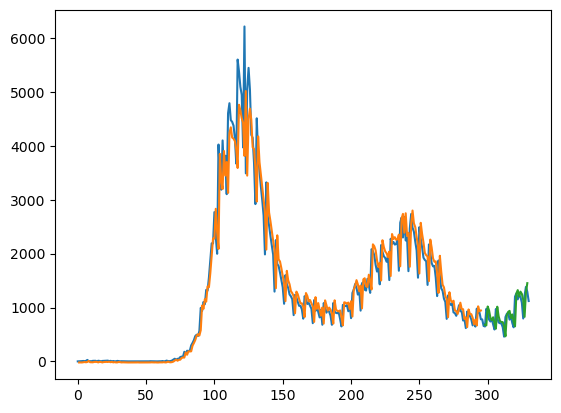

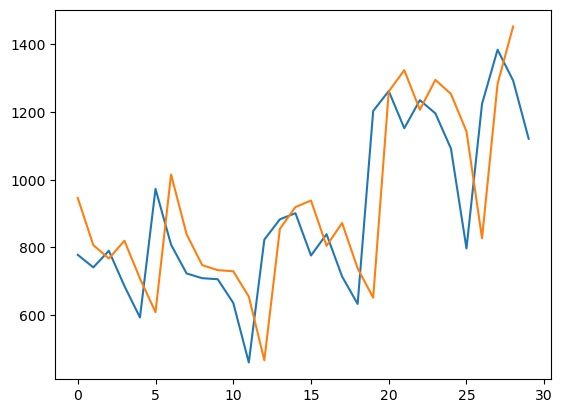

In [3]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    LSTM(64, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="changhua_rnn+lstm_5000_1.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('changhua_rnn+lstm_5000_1.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
#看裡面的值是否合理、資料結構的dim
print(trainPredict,trainY)
print(testPredict,testY)

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('changhua_rnn+lstm_5000_plot_1.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("changhua_rnn+lstm_5000_predict&real_1.png")
plt.show()

### Model2

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 1, 128)            16640     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148,353
Trainable params: 148,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
30/30 [==============================] - 5s 39ms/step - loss: 0.0724 - mse: 0.0724 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 2/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 3/5000
30/30 [==========================

30/30 [==============================] - 0s 8ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 57/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 58/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0152 - mse: 0.0152 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 59/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 60/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 61/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 62/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0140 - mse: 0.0140 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 63/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0138 -

30/30 [==============================] - 0s 10ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 118/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 119/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 120/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 121/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 122/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 123/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 124/5000
30/30 [==============================] - 0s 8ms/step - loss:

30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 179/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 180/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 181/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 182/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 183/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 184/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 185/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 240/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 241/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 242/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 243/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 245/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 246/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 301/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 302/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 303/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 304/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 305/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 306/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 307/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 362/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 363/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 364/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 365/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 366/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 367/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 368/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 423/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 424/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 425/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 426/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 427/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 428/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 429/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 484/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 485/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 486/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 487/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 488/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 489/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 490/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 545/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 546/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 547/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 548/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 549/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 550/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 551/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 606/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 607/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 608/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 609/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 610/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 611/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 612/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 667/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 668/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 669/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 670/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 671/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 672/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 673/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 728/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 729/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 730/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 731/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 732/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 733/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 734/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 789/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 790/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 791/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 792/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 793/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 794/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 795/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 850/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 851/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 852/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 853/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 854/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 855/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 856/5000
30/30 [==============================] - 0s 8ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 911/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 912/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 913/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 914/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 915/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 916/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 917/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 972/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 973/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 974/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 975/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 976/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 977/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 978/5000
30/30 [==============================] - 0s 7ms/step - loss: 0

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1033/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1034/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1035/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1036/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1037/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1038/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1039/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1093/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1094/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1095/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1096/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1097/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1098/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1099/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1100/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1154/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1155/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1156/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1157/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1158/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1159/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1160/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1214/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1215/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1216/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1217/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1218/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1219/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1220/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1221/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1275/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1276/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1277/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1278/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1279/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1280/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1281/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1335/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1336/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1337/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1338/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1339/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1340/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1341/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1342/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1396/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1397/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1398/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1399/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1400/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1401/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1402/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1456/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1457/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1458/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1459/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1460/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1461/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1462/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1463/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1517/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1518/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1519/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1520/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1521/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1522/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1523/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1577/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1578/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1579/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1580/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1581/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1582/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1583/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1584/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1638/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1639/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1640/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1641/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1642/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1643/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1644/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1698/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1699/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1700/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1701/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1702/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1703/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1704/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1705/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1759/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1760/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1761/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1762/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1763/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1764/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1765/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1819/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1820/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1821/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1822/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1823/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1824/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1825/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1826/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1880/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1881/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1882/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1883/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1884/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1885/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1886/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 1940/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1941/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1942/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1943/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1944/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1945/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1946/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1947/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2001/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2002/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2003/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2004/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2005/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2006/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2007/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2061/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2062/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2063/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2064/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2065/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2066/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2067/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2068/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2122/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2123/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2124/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2125/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2126/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2127/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2128/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2182/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2183/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2184/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2185/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2186/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2187/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2188/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2189/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2243/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2245/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2246/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2247/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2248/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2249/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2303/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2304/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2305/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2306/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2307/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2308/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2309/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2310/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2364/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2365/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2366/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2367/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2368/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2369/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2370/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2424/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2425/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2426/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2427/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2428/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2429/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2430/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2431/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2485/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2486/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2487/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2488/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2489/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2490/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2491/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2545/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2546/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2547/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2548/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2549/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2550/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2551/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2552/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2606/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2607/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2608/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2609/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2610/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2611/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2612/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2666/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2667/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2668/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2669/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2670/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2671/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2672/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2673/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2727/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2728/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2729/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2730/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2731/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2732/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2733/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 2787/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2788/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2789/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2790/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2791/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2792/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2793/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2794/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2848/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2849/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2850/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2851/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2852/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2853/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2854/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 2908/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2909/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2910/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2911/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2912/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2913/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2914/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2915/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2969/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2970/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2971/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2972/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2973/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2974/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2975/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3029/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3030/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3031/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3032/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3033/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3034/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3035/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3036/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3090/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3091/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3092/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3093/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3094/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3095/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3096/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3150/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3151/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3152/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3153/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3154/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3155/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3156/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3157/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3211/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3212/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3213/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3214/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3215/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3216/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3217/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3271/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3272/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3273/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3274/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3275/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3276/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3277/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3278/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3332/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3333/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3334/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3335/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3336/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3337/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3338/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3392/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3393/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3394/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3395/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3396/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3397/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3398/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3399/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3453/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3454/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3455/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3456/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3457/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3458/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3459/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3513/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3514/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3515/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3516/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3517/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3518/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3519/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3520/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3574/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3575/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3576/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3577/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3578/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3579/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3580/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3634/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3635/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3636/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3637/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3638/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3639/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3640/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3641/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3695/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3696/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3697/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3698/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3699/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3700/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3701/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3755/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3756/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3757/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3758/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3759/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3760/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3761/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3762/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3816/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3817/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3818/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3819/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3820/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3821/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3822/5000
30/30 [==============================] - 0s 9ms/step - 

Epoch 3876/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3877/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3878/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3879/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3880/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3881/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3882/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3883/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3937/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3938/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3939/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3940/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3941/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3942/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3943/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 3997/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3998/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3999/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4000/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4001/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4002/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4003/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4004/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4058/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4059/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4060/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4061/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4062/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4063/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4064/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4118/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4119/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4120/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4121/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4122/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4123/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4124/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4125/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4179/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4180/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4181/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4182/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4183/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4184/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4185/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4239/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4240/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4241/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4242/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4243/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4244/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4245/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4246/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4300/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4301/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4302/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4303/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4304/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4305/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4306/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 4360/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4361/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4362/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4363/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4364/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4365/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4366/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4367/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4421/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4422/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4423/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4424/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4425/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4426/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4427/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4481/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4482/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4483/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4484/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4485/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4486/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4487/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4488/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4542/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4543/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4544/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4545/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4546/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4547/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4548/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 4602/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4603/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4604/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4605/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4606/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4607/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4608/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4609/5000
30/30 [==============================] 

30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4663/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4664/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4665/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4666/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4667/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4668/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4669/5000
30/30 [==============================] - 0s 8ms/step - 

Epoch 4723/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4724/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4725/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4726/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4727/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4728/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4729/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4730/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4784/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4785/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4786/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4787/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4788/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4789/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4790/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4844/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4845/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4846/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4847/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4848/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4849/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4850/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4851/5000
30/30 [==============================] 

30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4905/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4906/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4907/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4908/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4909/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4910/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4911/5000
30/30 [==============================] - 0s 7ms/step - 

Epoch 4965/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4966/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4967/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4968/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4969/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4970/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4971/5000
30/30 [==============================] - 0s 7ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4972/5000
30/30 [==============================] 

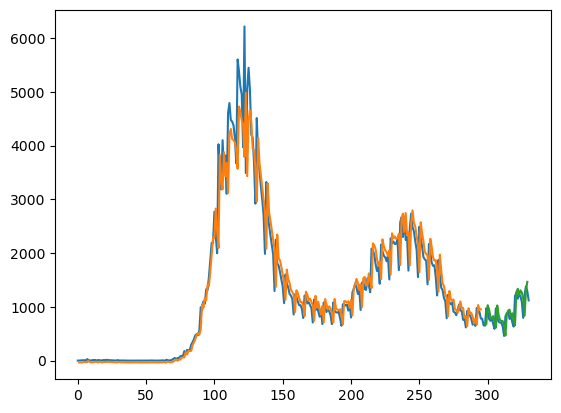

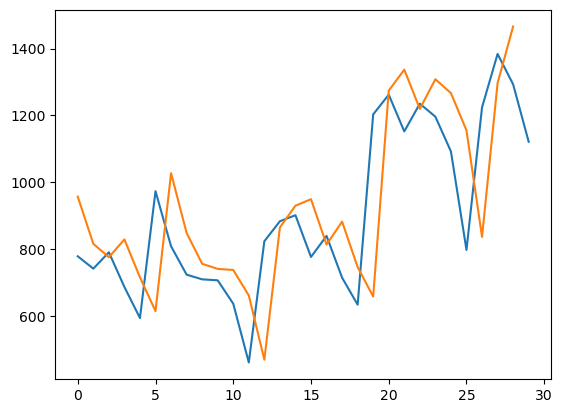

In [4]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(1, look_back)),
    LSTM(128, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="changhua_rnn+lstm_5000_2.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('changhua_rnn+lstm_5000_2.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('changhua_rnn+lstm_5000_plot_2.png') 
plt.show()
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("changhua_rnn+lstm_5000_predict&real_2.png")
plt.show()

### Model3

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 1, 64)             8256      
                                                                 
 dense_2 (Dense)             (None, 1, 64)             4160      
                                                                 
 lstm_2 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 82,753
Trainable params: 82,753
Non-trai

30/30 [==============================] - 0s 8ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 54/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 55/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 56/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 57/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 58/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 59/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 60/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0052 -

30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 115/5000
30/30 [==============================] - 0s 16ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 116/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 117/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 118/5000
30/30 [==============================] - 0s 15ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 119/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 120/5000
30/30 [==============================] - 0s 13ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 121/5000
30/30 [==============================] - 0s 8ms/step - loss

Epoch 175/5000
30/30 [==============================] - 0s 12ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.9081e-04 - val_mse: 9.9081e-04
Epoch 176/5000
30/30 [==============================] - 0s 12ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.8910e-04 - val_mse: 9.8910e-04
Epoch 177/5000
30/30 [==============================] - 0s 13ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.8736e-04 - val_mse: 9.8736e-04
Epoch 178/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.8822e-04 - val_mse: 9.8822e-04
Epoch 179/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.9066e-04 - val_mse: 9.9066e-04
Epoch 180/5000
30/30 [==============================] - 0s 14ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 9.8555e-04 - val_mse: 9.8555e-04
Epoch 181/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 9.8988e-04 - val_mse: 9.8988e-04
Ep

30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.7225e-04 - val_mse: 9.7225e-04
Epoch 233/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 9.6623e-04 - val_mse: 9.6623e-04
Epoch 234/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 9.7299e-04 - val_mse: 9.7299e-04
Epoch 235/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.6366e-04 - val_mse: 9.6366e-04
Epoch 236/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 9.6640e-04 - val_mse: 9.6640e-04
Epoch 237/5000
30/30 [==============================] - 0s 16ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.6077e-04 - val_mse: 9.6077e-04
Epoch 238/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.6431e-04 - val_mse: 9.6431e-04
Epoch 239/5000
30/3

Epoch 290/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5500e-04 - val_mse: 9.5500e-04
Epoch 291/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4815e-04 - val_mse: 9.4815e-04
Epoch 292/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.6543e-04 - val_mse: 9.6543e-04
Epoch 293/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5068e-04 - val_mse: 9.5068e-04
Epoch 294/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4918e-04 - val_mse: 9.4918e-04
Epoch 295/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5130e-04 - val_mse: 9.5130e-04
Epoch 296/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5855e-04 - val_mse: 9.5855e-04
Epoch

Epoch 348/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5347e-04 - val_mse: 9.5347e-04
Epoch 349/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5722e-04 - val_mse: 9.5722e-04
Epoch 350/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4815e-04 - val_mse: 9.4815e-04
Epoch 351/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.7725e-04 - val_mse: 9.7725e-04
Epoch 352/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4262e-04 - val_mse: 9.4262e-04
Epoch 353/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5187e-04 - val_mse: 9.5187e-04
Epoch 354/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4444e-04 - val_mse: 9.4444e-04
Epoch

Epoch 406/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4897e-04 - val_mse: 9.4897e-04
Epoch 407/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5364e-04 - val_mse: 9.5364e-04
Epoch 408/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.6310e-04 - val_mse: 9.6310e-04
Epoch 409/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5218e-04 - val_mse: 9.5218e-04
Epoch 410/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4376e-04 - val_mse: 9.4376e-04
Epoch 411/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4864e-04 - val_mse: 9.4864e-04
Epoch 412/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.4531e-04 - val_mse: 9.4531e-04
Epoch 

Epoch 464/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4570e-04 - val_mse: 9.4570e-04
Epoch 465/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5522e-04 - val_mse: 9.5522e-04
Epoch 466/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.3641e-04 - val_mse: 9.3641e-04
Epoch 467/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5704e-04 - val_mse: 9.5704e-04
Epoch 468/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4706e-04 - val_mse: 9.4706e-04
Epoch 469/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.3508e-04 - val_mse: 9.3508e-04
Epoch 470/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3334e-04 - val_mse: 9.3334e-04
Epoch

Epoch 522/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5365e-04 - val_mse: 9.5365e-04
Epoch 523/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3713e-04 - val_mse: 9.3713e-04
Epoch 524/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4088e-04 - val_mse: 9.4088e-04
Epoch 525/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4284e-04 - val_mse: 9.4284e-04
Epoch 526/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.2879e-04 - val_mse: 9.2879e-04
Epoch 527/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4323e-04 - val_mse: 9.4323e-04
Epoch 528/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3076e-04 - val_mse: 9.3076e-04
Epoch

30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.3197e-04 - val_mse: 9.3197e-04
Epoch 580/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4481e-04 - val_mse: 9.4481e-04
Epoch 581/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3051e-04 - val_mse: 9.3051e-04
Epoch 582/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3169e-04 - val_mse: 9.3169e-04
Epoch 583/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.6755e-04 - val_mse: 9.6755e-04
Epoch 584/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4891e-04 - val_mse: 9.4891e-04
Epoch 585/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3238e-04 - val_mse: 9.3238e-04
Epoch 586/5000
30/30 

Epoch 637/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2318e-04 - val_mse: 9.2318e-04
Epoch 638/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2717e-04 - val_mse: 9.2717e-04
Epoch 639/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4263e-04 - val_mse: 9.4263e-04
Epoch 640/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2700e-04 - val_mse: 9.2700e-04
Epoch 641/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.7384e-04 - val_mse: 9.7384e-04
Epoch 642/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3817e-04 - val_mse: 9.3817e-04
Epoch 643/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2760e-04 - val_mse: 9.2760e-04
Epoch 

Epoch 695/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5097e-04 - val_mse: 9.5097e-04
Epoch 696/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4355e-04 - val_mse: 9.4355e-04
Epoch 697/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4880e-04 - val_mse: 9.4880e-04
Epoch 698/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.3210e-04 - val_mse: 9.3210e-04
Epoch 699/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3643e-04 - val_mse: 9.3643e-04
Epoch 700/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4905e-04 - val_mse: 9.4905e-04
Epoch 701/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4574e-04 - val_mse: 9.4574e-04
Epoch 

Epoch 753/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4135e-04 - val_mse: 9.4135e-04
Epoch 754/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4396e-04 - val_mse: 9.4396e-04
Epoch 755/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2440e-04 - val_mse: 9.2440e-04
Epoch 756/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2428e-04 - val_mse: 9.2428e-04
Epoch 757/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5208e-04 - val_mse: 9.5208e-04
Epoch 758/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2868e-04 - val_mse: 9.2868e-04
Epoch 759/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2384e-04 - val_mse: 9.2384e-04
Epoch 

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2288e-04 - val_mse: 9.2288e-04
Epoch 811/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3745e-04 - val_mse: 9.3745e-04
Epoch 812/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2867e-04 - val_mse: 9.2867e-04
Epoch 813/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2761e-04 - val_mse: 9.2761e-04
Epoch 814/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2611e-04 - val_mse: 9.2611e-04
Epoch 815/5000
30/30 [==============================] - 0s 13ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1681e-04 - val_mse: 9.1681e-04
Epoch 816/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4035e-04 - val_mse: 9.4035e-04
Epoch 817/5000
30/30

Epoch 868/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3211e-04 - val_mse: 9.3211e-04
Epoch 869/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2275e-04 - val_mse: 9.2275e-04
Epoch 870/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2311e-04 - val_mse: 9.2311e-04
Epoch 871/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3039e-04 - val_mse: 9.3039e-04
Epoch 872/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3461e-04 - val_mse: 9.3461e-04
Epoch 873/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2459e-04 - val_mse: 9.2459e-04
Epoch 874/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3105e-04 - val_mse: 9.3105e-04
Epoc

Epoch 926/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5127e-04 - val_mse: 9.5126e-04
Epoch 927/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2039e-04 - val_mse: 9.2039e-04
Epoch 928/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3559e-04 - val_mse: 9.3559e-04
Epoch 929/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3803e-04 - val_mse: 9.3803e-04
Epoch 930/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3052e-04 - val_mse: 9.3052e-04
Epoch 931/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3014e-04 - val_mse: 9.3014e-04
Epoch 932/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2040e-04 - val_mse: 9.2040e-04
Epoch 

Epoch 984/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.5388e-04 - val_mse: 9.5388e-04
Epoch 985/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5671e-04 - val_mse: 9.5671e-04
Epoch 986/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4643e-04 - val_mse: 9.4643e-04
Epoch 987/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1812e-04 - val_mse: 9.1812e-04
Epoch 988/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2365e-04 - val_mse: 9.2365e-04
Epoch 989/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4517e-04 - val_mse: 9.4517e-04
Epoch 990/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2696e-04 - val_mse: 9.2696e-04
Epoch 

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4561e-04 - val_mse: 9.4561e-04
Epoch 1042/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2401e-04 - val_mse: 9.2401e-04
Epoch 1043/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4451e-04 - val_mse: 9.4451e-04
Epoch 1044/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4239e-04 - val_mse: 9.4239e-04
Epoch 1045/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2391e-04 - val_mse: 9.2391e-04
Epoch 1046/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3991e-04 - val_mse: 9.3991e-04
Epoch 1047/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3320e-04 - val_mse: 9.3320e-04
Epoch 1048/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5809e-04 - val_mse: 9.5809e-04
Epoch 1099/5000
30/30 [==============================] - 0s 13ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0707e-04 - val_mse: 9.0707e-04
Epoch 1100/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1870e-04 - val_mse: 9.1870e-04
Epoch 1101/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2377e-04 - val_mse: 9.2377e-04
Epoch 1102/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3865e-04 - val_mse: 9.3865e-04
Epoch 1103/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1879e-04 - val_mse: 9.1879e-04
Epoch 1104/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5898e-04 - val_mse: 9.5898e-04
Epoch 1105/500

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4766e-04 - val_mse: 9.4766e-04
Epoch 1156/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2382e-04 - val_mse: 9.2382e-04
Epoch 1157/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2558e-04 - val_mse: 9.2558e-04
Epoch 1158/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2265e-04 - val_mse: 9.2265e-04
Epoch 1159/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.6426e-04 - val_mse: 9.6426e-04
Epoch 1160/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2099e-04 - val_mse: 9.2099e-04
Epoch 1161/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3300e-04 - val_mse: 9.3300e-04
Epoch 1162/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3343e-04 - val_mse: 9.3343e-04
Epoch 1213/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2790e-04 - val_mse: 9.2790e-04
Epoch 1214/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.6868e-04 - val_mse: 9.6868e-04
Epoch 1215/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1984e-04 - val_mse: 9.1984e-04
Epoch 1216/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2938e-04 - val_mse: 9.2938e-04
Epoch 1217/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.3870e-04 - val_mse: 9.3870e-04
Epoch 1218/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4181e-04 - val_mse: 9.4181e-04
Epoch 1219/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2272e-04 - val_mse: 9.2272e-04
Epoch 1270/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3948e-04 - val_mse: 9.3948e-04
Epoch 1271/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4549e-04 - val_mse: 9.4549e-04
Epoch 1272/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4509e-04 - val_mse: 9.4509e-04
Epoch 1273/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1470e-04 - val_mse: 9.1470e-04
Epoch 1274/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3722e-04 - val_mse: 9.3722e-04
Epoch 1275/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2734e-04 - val_mse: 9.2734e-04
Epoch 1276/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2793e-04 - val_mse: 9.2793e-04
Epoch 1327/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2399e-04 - val_mse: 9.2399e-04
Epoch 1328/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2872e-04 - val_mse: 9.2872e-04
Epoch 1329/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1654e-04 - val_mse: 9.1654e-04
Epoch 1330/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0908e-04 - val_mse: 9.0908e-04
Epoch 1331/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.6525e-04 - val_mse: 9.6525e-04
Epoch 1332/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1351e-04 - val_mse: 9.1351e-04
Epoch 1333/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3407e-04 - val_mse: 9.3407e-04
Epoch 1384/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2897e-04 - val_mse: 9.2897e-04
Epoch 1385/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2557e-04 - val_mse: 9.2557e-04
Epoch 1386/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3347e-04 - val_mse: 9.3347e-04
Epoch 1387/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3397e-04 - val_mse: 9.3397e-04
Epoch 1388/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3158e-04 - val_mse: 9.3158e-04
Epoch 1389/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4975e-04 - val_mse: 9.4975e-04
Epoch 1390/500

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4288e-04 - val_mse: 9.4288e-04
Epoch 1441/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2206e-04 - val_mse: 9.2206e-04
Epoch 1442/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1494e-04 - val_mse: 9.1494e-04
Epoch 1443/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0926e-04 - val_mse: 9.0926e-04
Epoch 1444/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4428e-04 - val_mse: 9.4428e-04
Epoch 1445/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2058e-04 - val_mse: 9.2058e-04
Epoch 1446/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2722e-04 - val_mse: 9.2722e-04
Epoch 1447/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5928e-04 - val_mse: 9.5928e-04
Epoch 1498/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2336e-04 - val_mse: 9.2336e-04
Epoch 1499/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.6384e-04 - val_mse: 9.6384e-04
Epoch 1500/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3226e-04 - val_mse: 9.3226e-04
Epoch 1501/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2407e-04 - val_mse: 9.2407e-04
Epoch 1502/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3952e-04 - val_mse: 9.3952e-04
Epoch 1503/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2788e-04 - val_mse: 9.2788e-04
Epoch 1504/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1843e-04 - val_mse: 9.1843e-04
Epoch 1555/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2510e-04 - val_mse: 9.2510e-04
Epoch 1556/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4672e-04 - val_mse: 9.4672e-04
Epoch 1557/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2494e-04 - val_mse: 9.2494e-04
Epoch 1558/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4851e-04 - val_mse: 9.4851e-04
Epoch 1559/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3595e-04 - val_mse: 9.3595e-04
Epoch 1560/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2812e-04 - val_mse: 9.2812e-04
Epoch 1561/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1249e-04 - val_mse: 9.1249e-04
Epoch 1612/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3590e-04 - val_mse: 9.3590e-04
Epoch 1613/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3659e-04 - val_mse: 9.3659e-04
Epoch 1614/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3712e-04 - val_mse: 9.3712e-04
Epoch 1615/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4696e-04 - val_mse: 9.4696e-04
Epoch 1616/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2314e-04 - val_mse: 9.2314e-04
Epoch 1617/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2523e-04 - val_mse: 9.2523e-04
Epoch 1618/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1778e-04 - val_mse: 9.1778e-04
Epoch 1669/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2995e-04 - val_mse: 9.2995e-04
Epoch 1670/5000
30/30 [==============================] - 0s 13ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0160e-04 - val_mse: 9.0160e-04
Epoch 1671/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2854e-04 - val_mse: 9.2854e-04
Epoch 1672/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3376e-04 - val_mse: 9.3376e-04
Epoch 1673/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0889e-04 - val_mse: 9.0889e-04
Epoch 1674/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1672e-04 - val_mse: 9.1672e-04
Epoch 1675/500

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3404e-04 - val_mse: 9.3404e-04
Epoch 1726/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4623e-04 - val_mse: 9.4623e-04
Epoch 1727/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2490e-04 - val_mse: 9.2490e-04
Epoch 1728/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2353e-04 - val_mse: 9.2353e-04
Epoch 1729/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3527e-04 - val_mse: 9.3527e-04
Epoch 1730/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4513e-04 - val_mse: 9.4513e-04
Epoch 1731/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2762e-04 - val_mse: 9.2762e-04
Epoch 1732/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2120e-04 - val_mse: 9.2120e-04
Epoch 1783/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2156e-04 - val_mse: 9.2156e-04
Epoch 1784/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1890e-04 - val_mse: 9.1890e-04
Epoch 1785/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4567e-04 - val_mse: 9.4567e-04
Epoch 1786/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2498e-04 - val_mse: 9.2498e-04
Epoch 1787/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3767e-04 - val_mse: 9.3767e-04
Epoch 1788/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2875e-04 - val_mse: 9.2875e-04
Epoch 1789/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0925e-04 - val_mse: 9.0925e-04
Epoch 1840/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1511e-04 - val_mse: 9.1511e-04
Epoch 1841/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2748e-04 - val_mse: 9.2748e-04
Epoch 1842/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 9.3303e-04 - val_mse: 9.3303e-04
Epoch 1843/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.9513e-04 - val_mse: 8.9513e-04
Epoch 1844/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2080e-04 - val_mse: 9.2080e-04
Epoch 1845/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1916e-04 - val_mse: 9.1916e-04
Epoch 1846/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3341e-04 - val_mse: 9.3341e-04
Epoch 1897/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1503e-04 - val_mse: 9.1503e-04
Epoch 1898/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2559e-04 - val_mse: 9.2559e-04
Epoch 1899/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2634e-04 - val_mse: 9.2634e-04
Epoch 1900/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2902e-04 - val_mse: 9.2902e-04
Epoch 1901/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3187e-04 - val_mse: 9.3187e-04
Epoch 1902/5000
30/30 [==============================] - 1s 23ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.9188e-04 - val_mse: 8.9188e-04
Epoch 1903/500

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3037e-04 - val_mse: 9.3037e-04
Epoch 1954/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2443e-04 - val_mse: 9.2443e-04
Epoch 1955/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1830e-04 - val_mse: 9.1830e-04
Epoch 1956/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2775e-04 - val_mse: 9.2775e-04
Epoch 1957/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4691e-04 - val_mse: 9.4691e-04
Epoch 1958/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2972e-04 - val_mse: 9.2972e-04
Epoch 1959/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4571e-04 - val_mse: 9.4571e-04
Epoch 1960/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3020e-04 - val_mse: 9.3020e-04
Epoch 2011/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3780e-04 - val_mse: 9.3780e-04
Epoch 2012/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1214e-04 - val_mse: 9.1214e-04
Epoch 2013/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3182e-04 - val_mse: 9.3182e-04
Epoch 2014/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3334e-04 - val_mse: 9.3334e-04
Epoch 2015/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0606e-04 - val_mse: 9.0606e-04
Epoch 2016/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2228e-04 - val_mse: 9.2228e-04
Epoch 2017/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3438e-04 - val_mse: 9.3438e-04
Epoch 2068/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2504e-04 - val_mse: 9.2504e-04
Epoch 2069/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5024e-04 - val_mse: 9.5024e-04
Epoch 2070/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2903e-04 - val_mse: 9.2903e-04
Epoch 2071/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2313e-04 - val_mse: 9.2313e-04
Epoch 2072/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2778e-04 - val_mse: 9.2778e-04
Epoch 2073/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1009e-04 - val_mse: 9.1009e-04
Epoch 2074/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4559e-04 - val_mse: 9.4559e-04
Epoch 2125/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3267e-04 - val_mse: 9.3267e-04
Epoch 2126/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.9892e-04 - val_mse: 8.9892e-04
Epoch 2127/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2985e-04 - val_mse: 9.2985e-04
Epoch 2128/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1499e-04 - val_mse: 9.1499e-04
Epoch 2129/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2253e-04 - val_mse: 9.2253e-04
Epoch 2130/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2920e-04 - val_mse: 9.2920e-04
Epoch 2131/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1205e-04 - val_mse: 9.1205e-04
Epoch 2182/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0840e-04 - val_mse: 9.0840e-04
Epoch 2183/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4560e-04 - val_mse: 9.4560e-04
Epoch 2184/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4303e-04 - val_mse: 9.4303e-04
Epoch 2185/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1473e-04 - val_mse: 9.1473e-04
Epoch 2186/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2509e-04 - val_mse: 9.2509e-04
Epoch 2187/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2734e-04 - val_mse: 9.2734e-04
Epoch 2188/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2468e-04 - val_mse: 9.2468e-04
Epoch 2239/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1939e-04 - val_mse: 9.1939e-04
Epoch 2240/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1666e-04 - val_mse: 9.1666e-04
Epoch 2241/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2353e-04 - val_mse: 9.2353e-04
Epoch 2242/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3588e-04 - val_mse: 9.3588e-04
Epoch 2243/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1650e-04 - val_mse: 9.1650e-04
Epoch 2244/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4429e-04 - val_mse: 9.4429e-04
Epoch 2245/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2599e-04 - val_mse: 9.2599e-04
Epoch 2296/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2495e-04 - val_mse: 9.2495e-04
Epoch 2297/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2349e-04 - val_mse: 9.2349e-04
Epoch 2298/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3747e-04 - val_mse: 9.3747e-04
Epoch 2299/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2966e-04 - val_mse: 9.2966e-04
Epoch 2300/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1666e-04 - val_mse: 9.1666e-04
Epoch 2301/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3229e-04 - val_mse: 9.3229e-04
Epoch 2302/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1316e-04 - val_mse: 9.1316e-04
Epoch 2353/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2501e-04 - val_mse: 9.2501e-04
Epoch 2354/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0719e-04 - val_mse: 9.0719e-04
Epoch 2355/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1599e-04 - val_mse: 9.1599e-04
Epoch 2356/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2865e-04 - val_mse: 9.2865e-04
Epoch 2357/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3124e-04 - val_mse: 9.3124e-04
Epoch 2358/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4232e-04 - val_mse: 9.4232e-04
Epoch 2359/500

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1955e-04 - val_mse: 9.1955e-04
Epoch 2410/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4295e-04 - val_mse: 9.4295e-04
Epoch 2411/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1132e-04 - val_mse: 9.1132e-04
Epoch 2412/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3612e-04 - val_mse: 9.3612e-04
Epoch 2413/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0749e-04 - val_mse: 9.0749e-04
Epoch 2414/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4844e-04 - val_mse: 9.4844e-04
Epoch 2415/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1706e-04 - val_mse: 9.1706e-04
Epoch 2416/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2993e-04 - val_mse: 9.2993e-04
Epoch 2467/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2669e-04 - val_mse: 9.2669e-04
Epoch 2468/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1739e-04 - val_mse: 9.1739e-04
Epoch 2469/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2773e-04 - val_mse: 9.2773e-04
Epoch 2470/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0635e-04 - val_mse: 9.0635e-04
Epoch 2471/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2478e-04 - val_mse: 9.2478e-04
Epoch 2472/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4729e-04 - val_mse: 9.4729e-04
Epoch 2473/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4988e-04 - val_mse: 9.4988e-04
Epoch 2524/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2581e-04 - val_mse: 9.2581e-04
Epoch 2525/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5914e-04 - val_mse: 9.5914e-04
Epoch 2526/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2138e-04 - val_mse: 9.2138e-04
Epoch 2527/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2787e-04 - val_mse: 9.2787e-04
Epoch 2528/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2119e-04 - val_mse: 9.2119e-04
Epoch 2529/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3380e-04 - val_mse: 9.3380e-04
Epoch 2530/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1852e-04 - val_mse: 9.1852e-04
Epoch 2581/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3610e-04 - val_mse: 9.3610e-04
Epoch 2582/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2648e-04 - val_mse: 9.2648e-04
Epoch 2583/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4027e-04 - val_mse: 9.4027e-04
Epoch 2584/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2423e-04 - val_mse: 9.2423e-04
Epoch 2585/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2697e-04 - val_mse: 9.2697e-04
Epoch 2586/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1183e-04 - val_mse: 9.1183e-04
Epoch 2587/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2870e-04 - val_mse: 9.2870e-04
Epoch 2638/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2007e-04 - val_mse: 9.2007e-04
Epoch 2639/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1000e-04 - val_mse: 9.1000e-04
Epoch 2640/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1197e-04 - val_mse: 9.1197e-04
Epoch 2641/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2081e-04 - val_mse: 9.2081e-04
Epoch 2642/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3043e-04 - val_mse: 9.3043e-04
Epoch 2643/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1312e-04 - val_mse: 9.1312e-04
Epoch 2644/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3090e-04 - val_mse: 9.3090e-04
Epoch 2695/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3790e-04 - val_mse: 9.3790e-04
Epoch 2696/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2362e-04 - val_mse: 9.2362e-04
Epoch 2697/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2038e-04 - val_mse: 9.2038e-04
Epoch 2698/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3991e-04 - val_mse: 9.3991e-04
Epoch 2699/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1391e-04 - val_mse: 9.1391e-04
Epoch 2700/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1735e-04 - val_mse: 9.1735e-04
Epoch 2701/5000

30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1856e-04 - val_mse: 9.1856e-04
Epoch 2752/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1568e-04 - val_mse: 9.1568e-04
Epoch 2753/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4539e-04 - val_mse: 9.4539e-04
Epoch 2754/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.9937e-04 - val_mse: 8.9937e-04
Epoch 2755/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1860e-04 - val_mse: 9.1860e-04
Epoch 2756/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0101e-04 - val_mse: 9.0101e-04
Epoch 2757/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0743e-04 - val_mse: 9.0743e-04
Epoch 2758/500

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1540e-04 - val_mse: 9.1540e-04
Epoch 2809/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4228e-04 - val_mse: 9.4228e-04
Epoch 2810/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0766e-04 - val_mse: 9.0766e-04
Epoch 2811/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2621e-04 - val_mse: 9.2621e-04
Epoch 2812/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0558e-04 - val_mse: 9.0558e-04
Epoch 2813/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1642e-04 - val_mse: 9.1642e-04
Epoch 2814/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1309e-04 - val_mse: 9.1309e-04
Epoch 2815/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1632e-04 - val_mse: 9.1632e-04
Epoch 2866/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5255e-04 - val_mse: 9.5255e-04
Epoch 2867/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3145e-04 - val_mse: 9.3145e-04
Epoch 2868/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4327e-04 - val_mse: 9.4327e-04
Epoch 2869/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1869e-04 - val_mse: 9.1869e-04
Epoch 2870/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3817e-04 - val_mse: 9.3817e-04
Epoch 2871/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2048e-04 - val_mse: 9.2048e-04
Epoch 2872/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4036e-04 - val_mse: 9.4036e-04
Epoch 2923/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1937e-04 - val_mse: 9.1937e-04
Epoch 2924/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1165e-04 - val_mse: 9.1165e-04
Epoch 2925/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5699e-04 - val_mse: 9.5699e-04
Epoch 2926/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2414e-04 - val_mse: 9.2414e-04
Epoch 2927/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1842e-04 - val_mse: 9.1842e-04
Epoch 2928/5000
30/30 [==============================] - 2s 70ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.8452e-04 - val_mse: 8.8452e-04
Epoch 2929/500

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1422e-04 - val_mse: 9.1422e-04
Epoch 2980/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3538e-04 - val_mse: 9.3538e-04
Epoch 2981/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2557e-04 - val_mse: 9.2557e-04
Epoch 2982/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0871e-04 - val_mse: 9.0871e-04
Epoch 2983/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1796e-04 - val_mse: 9.1796e-04
Epoch 2984/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1556e-04 - val_mse: 9.1556e-04
Epoch 2985/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0756e-04 - val_mse: 9.0756e-04
Epoch 2986/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5899e-04 - val_mse: 9.5899e-04
Epoch 3037/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2171e-04 - val_mse: 9.2171e-04
Epoch 3038/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2409e-04 - val_mse: 9.2409e-04
Epoch 3039/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2810e-04 - val_mse: 9.2810e-04
Epoch 3040/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1415e-04 - val_mse: 9.1415e-04
Epoch 3041/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1275e-04 - val_mse: 9.1275e-04
Epoch 3042/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3936e-04 - val_mse: 9.3936e-04
Epoch 3043/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4777e-04 - val_mse: 9.4777e-04
Epoch 3094/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2758e-04 - val_mse: 9.2758e-04
Epoch 3095/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1999e-04 - val_mse: 9.1999e-04
Epoch 3096/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2679e-04 - val_mse: 9.2679e-04
Epoch 3097/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4682e-04 - val_mse: 9.4682e-04
Epoch 3098/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0935e-04 - val_mse: 9.0935e-04
Epoch 3099/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4243e-04 - val_mse: 9.4243e-04
Epoch 3100/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0609e-04 - val_mse: 9.0609e-04
Epoch 3151/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2388e-04 - val_mse: 9.2388e-04
Epoch 3152/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4366e-04 - val_mse: 9.4366e-04
Epoch 3153/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1792e-04 - val_mse: 9.1792e-04
Epoch 3154/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3292e-04 - val_mse: 9.3292e-04
Epoch 3155/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4283e-04 - val_mse: 9.4283e-04
Epoch 3156/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1889e-04 - val_mse: 9.1889e-04
Epoch 3157/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1336e-04 - val_mse: 9.1336e-04
Epoch 3208/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3508e-04 - val_mse: 9.3508e-04
Epoch 3209/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1928e-04 - val_mse: 9.1928e-04
Epoch 3210/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2128e-04 - val_mse: 9.2128e-04
Epoch 3211/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0577e-04 - val_mse: 9.0577e-04
Epoch 3212/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.7512e-04 - val_mse: 9.7512e-04
Epoch 3213/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4286e-04 - val_mse: 9.4286e-04
Epoch 3214/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5987e-04 - val_mse: 9.5987e-04
Epoch 3265/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3862e-04 - val_mse: 9.3862e-04
Epoch 3266/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2005e-04 - val_mse: 9.2005e-04
Epoch 3267/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0745e-04 - val_mse: 9.0745e-04
Epoch 3268/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0564e-04 - val_mse: 9.0564e-04
Epoch 3269/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.9843e-04 - val_mse: 8.9843e-04
Epoch 3270/5000
30/30 [==============================] - 1s 24ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3227e-04 - val_mse: 9.3227e-04
Epoch 3271/50

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3343e-04 - val_mse: 9.3343e-04
Epoch 3322/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1718e-04 - val_mse: 9.1718e-04
Epoch 3323/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1015e-04 - val_mse: 9.1015e-04
Epoch 3324/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1953e-04 - val_mse: 9.1953e-04
Epoch 3325/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0712e-04 - val_mse: 9.0712e-04
Epoch 3326/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3213e-04 - val_mse: 9.3213e-04
Epoch 3327/5000
30/30 [==============================] - 0s 13ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1272e-04 - val_mse: 9.1272e-04
Epoch 3328/

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3080e-04 - val_mse: 9.3080e-04
Epoch 3379/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1089e-04 - val_mse: 9.1089e-04
Epoch 3380/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4010e-04 - val_mse: 9.4010e-04
Epoch 3381/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1877e-04 - val_mse: 9.1877e-04
Epoch 3382/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1861e-04 - val_mse: 9.1861e-04
Epoch 3383/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.7304e-04 - val_mse: 9.7304e-04
Epoch 3384/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0939e-04 - val_mse: 9.0939e-04
Epoch 3385/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2279e-04 - val_mse: 9.2279e-04
Epoch 3436/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3609e-04 - val_mse: 9.3609e-04
Epoch 3437/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2830e-04 - val_mse: 9.2830e-04
Epoch 3438/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1402e-04 - val_mse: 9.1402e-04
Epoch 3439/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0999e-04 - val_mse: 9.0999e-04
Epoch 3440/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1748e-04 - val_mse: 9.1748e-04
Epoch 3441/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3013e-04 - val_mse: 9.3013e-04
Epoch 3442/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0460e-04 - val_mse: 9.0460e-04
Epoch 3493/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0338e-04 - val_mse: 9.0338e-04
Epoch 3494/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3780e-04 - val_mse: 9.3780e-04
Epoch 3495/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2009e-04 - val_mse: 9.2009e-04
Epoch 3496/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2962e-04 - val_mse: 9.2962e-04
Epoch 3497/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1257e-04 - val_mse: 9.1257e-04
Epoch 3498/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0685e-04 - val_mse: 9.0685e-04
Epoch 3499/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2651e-04 - val_mse: 9.2651e-04
Epoch 3550/5000
30/30 [==============================] - 0s 11ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.9413e-04 - val_mse: 8.9413e-04
Epoch 3551/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1963e-04 - val_mse: 9.1963e-04
Epoch 3552/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4257e-04 - val_mse: 9.4257e-04
Epoch 3553/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1104e-04 - val_mse: 9.1104e-04
Epoch 3554/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3535e-04 - val_mse: 9.3535e-04
Epoch 3555/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3870e-04 - val_mse: 9.3870e-04
Epoch 3556/500

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3689e-04 - val_mse: 9.3689e-04
Epoch 3607/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2063e-04 - val_mse: 9.2063e-04
Epoch 3608/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2963e-04 - val_mse: 9.2963e-04
Epoch 3609/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3717e-04 - val_mse: 9.3717e-04
Epoch 3610/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0779e-04 - val_mse: 9.0779e-04
Epoch 3611/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1501e-04 - val_mse: 9.1501e-04
Epoch 3612/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3134e-04 - val_mse: 9.3134e-04
Epoch 3613/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1463e-04 - val_mse: 9.1463e-04
Epoch 3664/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3179e-04 - val_mse: 9.3179e-04
Epoch 3665/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.9939e-04 - val_mse: 8.9939e-04
Epoch 3666/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2540e-04 - val_mse: 9.2540e-04
Epoch 3667/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2642e-04 - val_mse: 9.2642e-04
Epoch 3668/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2590e-04 - val_mse: 9.2590e-04
Epoch 3669/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0826e-04 - val_mse: 9.0826e-04
Epoch 3670/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1217e-04 - val_mse: 9.1217e-04
Epoch 3721/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4285e-04 - val_mse: 9.4285e-04
Epoch 3722/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1889e-04 - val_mse: 9.1889e-04
Epoch 3723/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2435e-04 - val_mse: 9.2435e-04
Epoch 3724/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2678e-04 - val_mse: 9.2678e-04
Epoch 3725/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4173e-04 - val_mse: 9.4173e-04
Epoch 3726/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2429e-04 - val_mse: 9.2429e-04
Epoch 3727/500

30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1305e-04 - val_mse: 9.1305e-04
Epoch 3778/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3836e-04 - val_mse: 9.3836e-04
Epoch 3779/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1059e-04 - val_mse: 9.1059e-04
Epoch 3780/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1453e-04 - val_mse: 9.1453e-04
Epoch 3781/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1671e-04 - val_mse: 9.1671e-04
Epoch 3782/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4649e-04 - val_mse: 9.4649e-04
Epoch 3783/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.9903e-04 - val_mse: 8.9903e-04
Epoch 3784/500

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2324e-04 - val_mse: 9.2324e-04
Epoch 3835/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3212e-04 - val_mse: 9.3212e-04
Epoch 3836/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3808e-04 - val_mse: 9.3808e-04
Epoch 3837/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1332e-04 - val_mse: 9.1332e-04
Epoch 3838/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2911e-04 - val_mse: 9.2911e-04
Epoch 3839/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2330e-04 - val_mse: 9.2330e-04
Epoch 3840/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0630e-04 - val_mse: 9.0630e-04
Epoch 3841/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1031e-04 - val_mse: 9.1031e-04
Epoch 3892/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3943e-04 - val_mse: 9.3943e-04
Epoch 3893/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1661e-04 - val_mse: 9.1661e-04
Epoch 3894/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1756e-04 - val_mse: 9.1756e-04
Epoch 3895/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4618e-04 - val_mse: 9.4618e-04
Epoch 3896/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2642e-04 - val_mse: 9.2642e-04
Epoch 3897/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3920e-04 - val_mse: 9.3920e-04
Epoch 3898/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2023e-04 - val_mse: 9.2023e-04
Epoch 3949/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3339e-04 - val_mse: 9.3339e-04
Epoch 3950/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1287e-04 - val_mse: 9.1287e-04
Epoch 3951/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0863e-04 - val_mse: 9.0863e-04
Epoch 3952/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3063e-04 - val_mse: 9.3063e-04
Epoch 3953/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2094e-04 - val_mse: 9.2094e-04
Epoch 3954/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1828e-04 - val_mse: 9.1828e-04
Epoch 3955/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2484e-04 - val_mse: 9.2484e-04
Epoch 4006/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0464e-04 - val_mse: 9.0464e-04
Epoch 4007/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.9845e-04 - val_mse: 8.9845e-04
Epoch 4008/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4019e-04 - val_mse: 9.4019e-04
Epoch 4009/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4416e-04 - val_mse: 9.4416e-04
Epoch 4010/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2592e-04 - val_mse: 9.2592e-04
Epoch 4011/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0857e-04 - val_mse: 9.0857e-04
Epoch 4012/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3524e-04 - val_mse: 9.3524e-04
Epoch 4063/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1984e-04 - val_mse: 9.1984e-04
Epoch 4064/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4077e-04 - val_mse: 9.4077e-04
Epoch 4065/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2385e-04 - val_mse: 9.2385e-04
Epoch 4066/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2747e-04 - val_mse: 9.2747e-04
Epoch 4067/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4662e-04 - val_mse: 9.4662e-04
Epoch 4068/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2877e-04 - val_mse: 9.2877e-04
Epoch 4069/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1576e-04 - val_mse: 9.1576e-04
Epoch 4120/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2232e-04 - val_mse: 9.2232e-04
Epoch 4121/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1368e-04 - val_mse: 9.1368e-04
Epoch 4122/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3551e-04 - val_mse: 9.3551e-04
Epoch 4123/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1164e-04 - val_mse: 9.1164e-04
Epoch 4124/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1804e-04 - val_mse: 9.1804e-04
Epoch 4125/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4959e-04 - val_mse: 9.4959e-04
Epoch 4126/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0742e-04 - val_mse: 9.0742e-04
Epoch 4177/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3000e-04 - val_mse: 9.3000e-04
Epoch 4178/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1533e-04 - val_mse: 9.1533e-04
Epoch 4179/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3115e-04 - val_mse: 9.3115e-04
Epoch 4180/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1432e-04 - val_mse: 9.1432e-04
Epoch 4181/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1324e-04 - val_mse: 9.1324e-04
Epoch 4182/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2959e-04 - val_mse: 9.2959e-04
Epoch 4183/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.9832e-04 - val_mse: 8.9832e-04
Epoch 4234/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2680e-04 - val_mse: 9.2680e-04
Epoch 4235/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3653e-04 - val_mse: 9.3653e-04
Epoch 4236/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2831e-04 - val_mse: 9.2831e-04
Epoch 4237/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0774e-04 - val_mse: 9.0774e-04
Epoch 4238/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0387e-04 - val_mse: 9.0387e-04
Epoch 4239/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1378e-04 - val_mse: 9.1378e-04
Epoch 4240/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3643e-04 - val_mse: 9.3643e-04
Epoch 4291/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1005e-04 - val_mse: 9.1005e-04
Epoch 4292/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2861e-04 - val_mse: 9.2861e-04
Epoch 4293/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1207e-04 - val_mse: 9.1207e-04
Epoch 4294/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1248e-04 - val_mse: 9.1248e-04
Epoch 4295/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2417e-04 - val_mse: 9.2417e-04
Epoch 4296/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3216e-04 - val_mse: 9.3216e-04
Epoch 4297/5000

30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2425e-04 - val_mse: 9.2425e-04
Epoch 4348/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3197e-04 - val_mse: 9.3197e-04
Epoch 4349/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3408e-04 - val_mse: 9.3408e-04
Epoch 4350/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1836e-04 - val_mse: 9.1836e-04
Epoch 4351/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4074e-04 - val_mse: 9.4074e-04
Epoch 4352/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3433e-04 - val_mse: 9.3433e-04
Epoch 4353/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1440e-04 - val_mse: 9.1440e-04
Epoch 4354/500

30/30 [==============================] - 0s 14ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1916e-04 - val_mse: 9.1916e-04
Epoch 4405/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1051e-04 - val_mse: 9.1051e-04
Epoch 4406/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2666e-04 - val_mse: 9.2666e-04
Epoch 4407/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4262e-04 - val_mse: 9.4262e-04
Epoch 4408/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1747e-04 - val_mse: 9.1747e-04
Epoch 4409/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3006e-04 - val_mse: 9.3006e-04
Epoch 4410/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3364e-04 - val_mse: 9.3364e-04
Epoch 4411/50

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3910e-04 - val_mse: 9.3910e-04
Epoch 4462/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1910e-04 - val_mse: 9.1910e-04
Epoch 4463/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3037e-04 - val_mse: 9.3037e-04
Epoch 4464/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2069e-04 - val_mse: 9.2069e-04
Epoch 4465/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2149e-04 - val_mse: 9.2149e-04
Epoch 4466/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3807e-04 - val_mse: 9.3807e-04
Epoch 4467/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1489e-04 - val_mse: 9.1489e-04
Epoch 4468/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2060e-04 - val_mse: 9.2060e-04
Epoch 4519/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0881e-04 - val_mse: 9.0881e-04
Epoch 4520/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1507e-04 - val_mse: 9.1507e-04
Epoch 4521/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2377e-04 - val_mse: 9.2377e-04
Epoch 4522/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2183e-04 - val_mse: 9.2183e-04
Epoch 4523/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2008e-04 - val_mse: 9.2008e-04
Epoch 4524/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2110e-04 - val_mse: 9.2110e-04
Epoch 4525/500

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2706e-04 - val_mse: 9.2706e-04
Epoch 4576/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 8.9966e-04 - val_mse: 8.9966e-04
Epoch 4577/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3192e-04 - val_mse: 9.3192e-04
Epoch 4578/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2465e-04 - val_mse: 9.2465e-04
Epoch 4579/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4559e-04 - val_mse: 9.4559e-04
Epoch 4580/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2448e-04 - val_mse: 9.2448e-04
Epoch 4581/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4349e-04 - val_mse: 9.4349e-04
Epoch 4582/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3111e-04 - val_mse: 9.3111e-04
Epoch 4633/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2889e-04 - val_mse: 9.2889e-04
Epoch 4634/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3384e-04 - val_mse: 9.3384e-04
Epoch 4635/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2880e-04 - val_mse: 9.2880e-04
Epoch 4636/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0936e-04 - val_mse: 9.0936e-04
Epoch 4637/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3182e-04 - val_mse: 9.3182e-04
Epoch 4638/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3346e-04 - val_mse: 9.3346e-04
Epoch 4639/5000

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0635e-04 - val_mse: 9.0635e-04
Epoch 4690/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0940e-04 - val_mse: 9.0940e-04
Epoch 4691/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1562e-04 - val_mse: 9.1562e-04
Epoch 4692/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2296e-04 - val_mse: 9.2296e-04
Epoch 4693/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4827e-04 - val_mse: 9.4827e-04
Epoch 4694/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1243e-04 - val_mse: 9.1243e-04
Epoch 4695/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2217e-04 - val_mse: 9.2217e-04
Epoch 4696/500

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1859e-04 - val_mse: 9.1859e-04
Epoch 4747/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3686e-04 - val_mse: 9.3686e-04
Epoch 4748/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4803e-04 - val_mse: 9.4803e-04
Epoch 4749/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5106e-04 - val_mse: 9.5106e-04
Epoch 4750/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4493e-04 - val_mse: 9.4493e-04
Epoch 4751/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3449e-04 - val_mse: 9.3449e-04
Epoch 4752/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2264e-04 - val_mse: 9.2264e-04
Epoch 4753/500

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1644e-04 - val_mse: 9.1644e-04
Epoch 4804/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0804e-04 - val_mse: 9.0804e-04
Epoch 4805/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4973e-04 - val_mse: 9.4973e-04
Epoch 4806/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1650e-04 - val_mse: 9.1650e-04
Epoch 4807/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2501e-04 - val_mse: 9.2501e-04
Epoch 4808/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0624e-04 - val_mse: 9.0624e-04
Epoch 4809/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.4195e-04 - val_mse: 9.4195e-04
Epoch 4810/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2771e-04 - val_mse: 9.2771e-04
Epoch 4861/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1646e-04 - val_mse: 9.1646e-04
Epoch 4862/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2809e-04 - val_mse: 9.2809e-04
Epoch 4863/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3290e-04 - val_mse: 9.3290e-04
Epoch 4864/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0959e-04 - val_mse: 9.0959e-04
Epoch 4865/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2758e-04 - val_mse: 9.2758e-04
Epoch 4866/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0507e-04 - val_mse: 9.0507e-04
Epoch 4867/500

30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1533e-04 - val_mse: 9.1533e-04
Epoch 4918/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3157e-04 - val_mse: 9.3157e-04
Epoch 4919/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3100e-04 - val_mse: 9.3100e-04
Epoch 4920/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2652e-04 - val_mse: 9.2652e-04
Epoch 4921/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2229e-04 - val_mse: 9.2229e-04
Epoch 4922/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2449e-04 - val_mse: 9.2449e-04
Epoch 4923/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1207e-04 - val_mse: 9.1207e-04
Epoch 4924/5000

30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.3167e-04 - val_mse: 9.3167e-04
Epoch 4975/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.2690e-04 - val_mse: 9.2690e-04
Epoch 4976/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.0478e-04 - val_mse: 9.0478e-04
Epoch 4977/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1196e-04 - val_mse: 9.1196e-04
Epoch 4978/5000
30/30 [==============================] - 0s 10ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1350e-04 - val_mse: 9.1350e-04
Epoch 4979/5000
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.5047e-04 - val_mse: 9.5047e-04
Epoch 4980/5000
30/30 [==============================] - 0s 9ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 9.1748e-04 - val_mse: 9.1748e-04
Epoch 4981/500

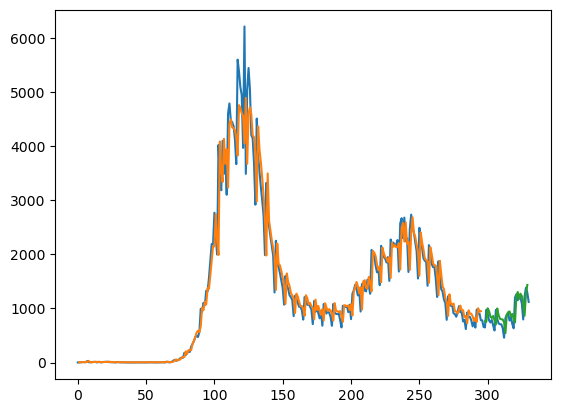

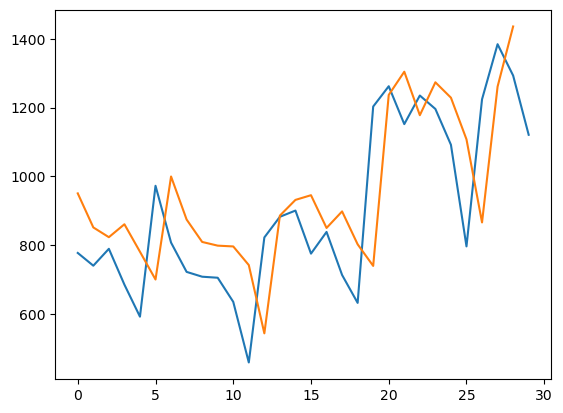

In [5]:
from tensorflow.keras.layers import Flatten,Reshape
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    SimpleRNN(64, return_sequences=True, activation='selu'),
    Dense(64, activation='selu'),
    LSTM(64, return_sequences=True, activation='selu'),
    LSTM(64, return_sequences=False, activation='selu'),
    Dense(1, activation='tanh')
])

model.output_shape
#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="changhua_rnn+lstm_5000_3.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=10, verbose=1,callbacks=[model_checkpoint_callback])
model.save('changhua_rnn+lstm_5000_3.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)

# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖8
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('changhua_rnn+lstm_5000_plot_3.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("changhua_rnn+lstm_5000_predict&real_3.png")
plt.show()

### Model4

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 1, 64)             4224      
                                                                 
 dense_4 (Dense)             (None, 1, 4)              260       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1, 64)             4416      
                                                                 
 dense_5 (Dense)             (None, 1, 1)              65        
                                                                 
 lstm_4 (LSTM)               (None, 1, 64)             16896     
                                                                 
 dense_6 (Dense)             (None, 1, 4)              260       
                                                                 
 lstm_5 (LSTM)               (None, 1, 64)            

Epoch 51/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0433 - mse: 0.0433 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 52/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0429 - mse: 0.0429 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 53/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0428 - mse: 0.0428 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 54/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 55/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 56/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0413 - mse: 0.0413 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 57/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0412 - mse: 0.0412 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 58/5000
295/295 [==============================] 

295/295 [==============================] - 2s 7ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 111/5000
295/295 [==============================] - 2s 7ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 112/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 113/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 114/5000
295/295 [==============================] - 2s 7ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 115/5000
295/295 [==============================] - 2s 7ms/step - loss: 0.0139 - mse: 0.0139 - val_loss: 9.6636e-04 - val_mse: 9.6636e-04
Epoch 116/5000
295/295 [==============================] - 2s 8ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 117/5000
295/295 [==============================]

295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 170/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.6522e-04 - val_mse: 9.6522e-04
Epoch 171/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 172/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 9.5069e-04 - val_mse: 9.5069e-04
Epoch 173/5000
295/295 [==============================] - 2s 5ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 9.3127e-04 - val_mse: 9.3127e-04
Epoch 174/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 175/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 176/5000
295/295 [===============

Epoch 228/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 229/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 9.6859e-04 - val_mse: 9.6859e-04
Epoch 230/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 231/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 232/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 9.6918e-04 - val_mse: 9.6918e-04
Epoch 233/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 9.8549e-04 - val_mse: 9.8549e-04
Epoch 234/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 235/5000
295/295 [

295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 9.5710e-04 - val_mse: 9.5710e-04
Epoch 287/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 288/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 289/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 290/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 291/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 292/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 293/5000
295/295 [==============================]

Epoch 345/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 346/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 9.0556e-04 - val_mse: 9.0556e-04
Epoch 347/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 348/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 9.1049e-04 - val_mse: 9.1049e-04
Epoch 349/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 8.9057e-04 - val_mse: 8.9057e-04
Epoch 350/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 351/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 9.2812e-04 - val_mse: 9.2812e-04
Epoch 352/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 404/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 9.3773e-04 - val_mse: 9.3773e-04
Epoch 405/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 406/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.8453e-04 - val_mse: 9.8453e-04
Epoch 407/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 408/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0143 - mse: 0.0143 - val_loss: 9.0506e-04 - val_mse: 9.0506e-04
Epoch 409/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 9.1124e-04 - val_mse: 9.1124e-04
Epoch 410/5000
295/295 [=======

Epoch 462/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 463/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 9.4124e-04 - val_mse: 9.4124e-04
Epoch 464/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 9.1596e-04 - val_mse: 9.1596e-04
Epoch 465/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 466/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 9.3298e-04 - val_mse: 9.3298e-04
Epoch 467/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 8.9709e-04 - val_mse: 8.9709e-04
Epoch 468/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 9.0240e-04 - val_mse: 9.0240e-04
Epoch 46

295/295 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 9.1019e-04 - val_mse: 9.1019e-04
Epoch 521/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 522/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 523/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 9.0153e-04 - val_mse: 9.0153e-04
Epoch 524/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 9.8815e-04 - val_mse: 9.8815e-04
Epoch 525/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.7407e-04 - val_mse: 8.7407e-04
Epoch 526/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 8.9125e-04 - val_mse: 8.9125e-04
Epoch 527/5000
295/295 

295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 579/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 580/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 9.3530e-04 - val_mse: 9.3530e-04
Epoch 581/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 582/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 583/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 584/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 9.1332e-04 - val_mse: 9.1332e-04
Epoch 585/5000
295/295 [=======================

295/295 [==============================] - 2s 6ms/step - loss: 0.0126 - mse: 0.0126 - val_loss: 8.7197e-04 - val_mse: 8.7197e-04
Epoch 637/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.1208e-04 - val_mse: 9.1208e-04
Epoch 638/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 8.9375e-04 - val_mse: 8.9375e-04
Epoch 639/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 9.4116e-04 - val_mse: 9.4116e-04
Epoch 640/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 641/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 8.8886e-04 - val_mse: 8.8886e-04
Epoch 642/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 8.7202e-04 - val_mse: 8.7202e-04
Epoch 643/5000


295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 695/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 8.9426e-04 - val_mse: 8.9426e-04
Epoch 696/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 9.4908e-04 - val_mse: 9.4908e-04
Epoch 697/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 9.4797e-04 - val_mse: 9.4797e-04
Epoch 698/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 9.0129e-04 - val_mse: 9.0129e-04
Epoch 699/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 8.9504e-04 - val_mse: 8.9504e-04
Epoch 700/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 701/5000
295/295 

295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.9490e-04 - val_mse: 8.9490e-04
Epoch 753/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 754/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 9.1009e-04 - val_mse: 9.1009e-04
Epoch 755/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 8.9183e-04 - val_mse: 8.9183e-04
Epoch 756/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 757/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 758/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 8.8868e-04 - val_mse: 8.8868e-04
Epoch 759/5000
295/295 [=======

295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 9.1249e-04 - val_mse: 9.1249e-04
Epoch 811/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.0233e-04 - val_mse: 9.0233e-04
Epoch 812/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 8.7698e-04 - val_mse: 8.7698e-04
Epoch 813/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 814/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 815/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 816/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 817/5000
295/295 [===============

Epoch 869/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 8.7776e-04 - val_mse: 8.7776e-04
Epoch 870/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 8.6459e-04 - val_mse: 8.6459e-04
Epoch 871/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 872/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 873/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 874/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 8.9821e-04 - val_mse: 8.9821e-04
Epoch 875/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 876/5000
295/295 [

295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 8.7237e-04 - val_mse: 8.7237e-04
Epoch 928/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 929/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 9.4680e-04 - val_mse: 9.4680e-04
Epoch 930/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 9.2158e-04 - val_mse: 9.2158e-04
Epoch 931/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 9.0326e-04 - val_mse: 9.0326e-04
Epoch 932/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 8.8373e-04 - val_mse: 8.8373e-04
Epoch 933/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 934/5000
295/295 

295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 8.8302e-04 - val_mse: 8.8302e-04
Epoch 986/5000
295/295 [==============================] - 2s 5ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 8.5451e-04 - val_mse: 8.5451e-04
Epoch 987/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 8.5458e-04 - val_mse: 8.5458e-04
Epoch 988/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.4600e-04 - val_mse: 8.4600e-04
Epoch 989/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 9.4823e-04 - val_mse: 9.4823e-04
Epoch 990/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 9.6955e-04 - val_mse: 9.6955e-04
Epoch 991/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 992/5000


295/295 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 1043/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 9.1988e-04 - val_mse: 9.1988e-04
Epoch 1044/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 8.8869e-04 - val_mse: 8.8869e-04
Epoch 1045/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1046/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 8.8246e-04 - val_mse: 8.8246e-04
Epoch 1047/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 9.0248e-04 - val_mse: 9.0248e-04
Epoch 1048/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 9.8451e-04 - val_mse: 9.8451e-04
Epoch 1049/5000
2

Epoch 1100/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 9.2105e-04 - val_mse: 9.2105e-04
Epoch 1101/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1102/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 9.4693e-04 - val_mse: 9.4693e-04
Epoch 1103/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 1104/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 1105/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 8.7924e-04 - val_mse: 8.7924e-04
Epoch 1106/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1107/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1158/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 1159/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 1160/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 1161/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1162/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 9.1814e-04 - val_mse: 9.1814e-04
Epoch 1163/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1164/5000
295/295 [========================

295/295 [==============================] - 2s 6ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 1216/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 1217/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1218/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 1219/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 9.1346e-04 - val_mse: 9.1346e-04
Epoch 1220/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 9.7568e-04 - val_mse: 9.7568e-04
Epoch 1221/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 9.8814e-04 - val_mse: 9.8814e-04
Epoch 1222/5000
295/295 [========

Epoch 1273/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1274/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 1275/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 8.9580e-04 - val_mse: 8.9580e-04
Epoch 1276/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 1277/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 8.6267e-04 - val_mse: 8.6267e-04
Epoch 1278/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 1279/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 8.6936e-04 - val_mse: 8.6936e-04
Epoch 1280/5000
2

Epoch 1331/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 9.6707e-04 - val_mse: 9.6707e-04
Epoch 1332/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 1333/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 9.1101e-04 - val_mse: 9.1101e-04
Epoch 1334/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 1335/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 8.7936e-04 - val_mse: 8.7936e-04
Epoch 1336/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 9.7082e-04 - val_mse: 9.7082e-04
Epoch 1337/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 133

295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 1389/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 1390/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 8.8567e-04 - val_mse: 8.8567e-04
Epoch 1391/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 8.8826e-04 - val_mse: 8.8826e-04
Epoch 1392/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 8.4150e-04 - val_mse: 8.4150e-04
Epoch 1393/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1394/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 8.7079e-04 - val_mse: 8.7079e-04
Epoch 1395/5000
295/295 [

295/295 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 9.3470e-04 - val_mse: 9.3470e-04
Epoch 1446/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1447/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 1448/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 9.7465e-04 - val_mse: 9.7465e-04
Epoch 1449/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.3529e-04 - val_mse: 9.3529e-04
Epoch 1450/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 9.1765e-04 - val_mse: 9.1765e-04
Epoch 1451/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 9.0279e-04 - val_mse: 9.0279e-04
Epoch 1452/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 8.6450e-04 - val_mse: 8.6450e-04
Epoch 1503/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1504/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 8.9747e-04 - val_mse: 8.9747e-04
Epoch 1505/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 9.0337e-04 - val_mse: 9.0337e-04
Epoch 1506/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 8.8366e-04 - val_mse: 8.8366e-04
Epoch 1507/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 8.6233e-04 - val_mse: 8.6233e-04
Epoch 1508/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1509/5000
2

Epoch 1560/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 8.6420e-04 - val_mse: 8.6420e-04
Epoch 1561/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1562/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 9.3023e-04 - val_mse: 9.3023e-04
Epoch 1563/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 1564/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 8.9331e-04 - val_mse: 8.9331e-04
Epoch 1565/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 8.8953e-04 - val_mse: 8.8953e-04
Epoch 1566/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 8.6206e-04 - val_mse: 8.6206e-04
E

295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.1605e-04 - val_mse: 9.1605e-04
Epoch 1618/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1619/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 9.0435e-04 - val_mse: 9.0435e-04
Epoch 1620/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 1621/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 8.6656e-04 - val_mse: 8.6656e-04
Epoch 1622/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 9.8661e-04 - val_mse: 9.8661e-04
Epoch 1623/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1624/5000
295/295 [

Epoch 1675/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 8.6168e-04 - val_mse: 8.6168e-04
Epoch 1676/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.8088e-04 - val_mse: 8.8088e-04
Epoch 1677/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 1678/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 9.8605e-04 - val_mse: 9.8605e-04
Epoch 1679/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 9.3145e-04 - val_mse: 9.3145e-04
Epoch 1680/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 8.5088e-04 - val_mse: 8.5088e-04
Epoch 1681/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 9.3515e-04 - val_mse: 9.35

295/295 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 9.1812e-04 - val_mse: 9.1812e-04
Epoch 1733/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 9.1092e-04 - val_mse: 9.1092e-04
Epoch 1734/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 8.6829e-04 - val_mse: 8.6829e-04
Epoch 1735/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 1736/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 8.6591e-04 - val_mse: 8.6591e-04
Epoch 1737/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.8321e-04 - val_mse: 8.8321e-04
Epoch 1738/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 9.4012e-04 - val_mse: 9.4012e-04
Epoch 173

295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.8041e-04 - val_mse: 9.8041e-04
Epoch 1790/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1791/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 9.2155e-04 - val_mse: 9.2155e-04
Epoch 1792/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 8.6225e-04 - val_mse: 8.6225e-04
Epoch 1793/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 1794/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1795/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 9.4502e-04 - val_mse: 9.4502e-04
Epoch 1796/5000
295/295 [

295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 1847/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 8.7550e-04 - val_mse: 8.7550e-04
Epoch 1848/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 9.8348e-04 - val_mse: 9.8348e-04
Epoch 1849/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 9.1910e-04 - val_mse: 9.1910e-04
Epoch 1850/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 9.8745e-04 - val_mse: 9.8745e-04
Epoch 1851/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 8.9761e-04 - val_mse: 8.9761e-04
Epoch 1852/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 8.8721e-04 - val_mse: 8.8721e-04
Epoch 185

295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 9.2362e-04 - val_mse: 9.2362e-04
Epoch 1904/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 9.5436e-04 - val_mse: 9.5436e-04
Epoch 1905/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 1906/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1907/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 1908/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 1909/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 1910/5000
295/295 [================

Epoch 1961/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 1962/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 8.8644e-04 - val_mse: 8.8644e-04
Epoch 1963/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 8.8631e-04 - val_mse: 8.8631e-04
Epoch 1964/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 8.6138e-04 - val_mse: 8.6138e-04
Epoch 1965/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 9.2604e-04 - val_mse: 9.2604e-04
Epoch 1966/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.1342e-04 - val_mse: 9.1342e-04
Epoch 1967/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 8.7444e-04 - val_mse: 8.74

295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 8.5914e-04 - val_mse: 8.5914e-04
Epoch 2019/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 8.6708e-04 - val_mse: 8.6708e-04
Epoch 2020/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 9.6107e-04 - val_mse: 9.6107e-04
Epoch 2021/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2022/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 9.7602e-04 - val_mse: 9.7602e-04
Epoch 2023/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 8.6043e-04 - val_mse: 8.6043e-04
Epoch 2024/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2025/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2076/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 9.5700e-04 - val_mse: 9.5700e-04
Epoch 2077/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 9.8198e-04 - val_mse: 9.8198e-04
Epoch 2078/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 8.8634e-04 - val_mse: 8.8634e-04
Epoch 2079/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2080/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 2081/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 8.7488e-04 - val_mse: 8.7488e-04
Epoch 2082/5000
295/295 [

Epoch 2133/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 8.9833e-04 - val_mse: 8.9833e-04
Epoch 2134/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2135/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 8.5480e-04 - val_mse: 8.5480e-04
Epoch 2136/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 9.2967e-04 - val_mse: 9.2967e-04
Epoch 2137/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 9.4366e-04 - val_mse: 9.4366e-04
Epoch 2138/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2139/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 214

295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 8.7057e-04 - val_mse: 8.7057e-04
Epoch 2191/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2192/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 9.2716e-04 - val_mse: 9.2716e-04
Epoch 2193/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 8.7820e-04 - val_mse: 8.7820e-04
Epoch 2194/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 8.7227e-04 - val_mse: 8.7227e-04
Epoch 2195/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2196/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 9.0246e-04 - val_mse: 9.0246e-04
Epoch 2197/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 8.9472e-04 - val_mse: 8.9472e-04
Epoch 2248/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 2249/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 8.9260e-04 - val_mse: 8.9260e-04
Epoch 2250/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2251/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 8.6669e-04 - val_mse: 8.6669e-04
Epoch 2252/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2253/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 2254/5000
295/295 [========

Epoch 2305/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2306/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 2307/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 8.6625e-04 - val_mse: 8.6625e-04
Epoch 2308/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 2309/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2310/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 8.6338e-04 - val_mse: 8.6338e-04
Epoch 2311/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 9.8679e-04 - val_mse: 9.8679e-04
Epoch 2312/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 9.2871e-04 - val_mse: 9.2871e-04
Epoch 2363/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2364/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 8.7623e-04 - val_mse: 8.7623e-04
Epoch 2365/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 9.6191e-04 - val_mse: 9.6191e-04
Epoch 2366/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 8.7193e-04 - val_mse: 8.7193e-04
Epoch 2367/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 9.5330e-04 - val_mse: 9.5330e-04
Epoch 2368/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 8.7241e-04 - val_mse: 8.7241e-04
Epoch 236

295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 8.8799e-04 - val_mse: 8.8799e-04
Epoch 2420/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2421/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2422/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 9.3503e-04 - val_mse: 9.3503e-04
Epoch 2423/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2424/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 9.1253e-04 - val_mse: 9.1253e-04
Epoch 2425/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2426/5000
295/295 [========

295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2477/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 8.7624e-04 - val_mse: 8.7624e-04
Epoch 2478/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2479/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 9.3266e-04 - val_mse: 9.3266e-04
Epoch 2480/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 8.9089e-04 - val_mse: 8.9089e-04
Epoch 2481/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2482/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 9.3875e-04 - val_mse: 9.3875e-04
Epoch 2483/5000
295/295 [

Epoch 2534/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 9.8935e-04 - val_mse: 9.8935e-04
Epoch 2535/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 9.0723e-04 - val_mse: 9.0723e-04
Epoch 2536/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.9877e-04 - val_mse: 8.9877e-04
Epoch 2537/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 9.4944e-04 - val_mse: 9.4944e-04
Epoch 2538/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2539/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2540/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 8.7974e-04 - val_mse: 8.7974e-04
E

295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.9776e-04 - val_mse: 8.9776e-04
Epoch 2592/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 8.7105e-04 - val_mse: 8.7105e-04
Epoch 2593/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2594/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2595/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 8.6755e-04 - val_mse: 8.6755e-04
Epoch 2596/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 9.0358e-04 - val_mse: 9.0358e-04
Epoch 2597/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 9.5166e-04 - val_mse: 9.5166e-04
Epoch 2598/5000
2

Epoch 2649/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2650/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2651/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 9.4396e-04 - val_mse: 9.4396e-04
Epoch 2652/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 8.9820e-04 - val_mse: 8.9820e-04
Epoch 2653/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 8.6888e-04 - val_mse: 8.6888e-04
Epoch 2654/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 8.8259e-04 - val_mse: 8.8259e-04
Epoch 2655/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 265

295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 9.6146e-04 - val_mse: 9.6146e-04
Epoch 2707/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 8.8099e-04 - val_mse: 8.8099e-04
Epoch 2708/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2709/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 8.7654e-04 - val_mse: 8.7654e-04
Epoch 2710/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2711/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 9.1124e-04 - val_mse: 9.1124e-04
Epoch 2712/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 9.2474e-04 - val_mse: 9.2474e-04
Epoch 2713/5000
2

Epoch 2764/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2765/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 9.8860e-04 - val_mse: 9.8860e-04
Epoch 2766/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 9.0440e-04 - val_mse: 9.0440e-04
Epoch 2767/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 8.9037e-04 - val_mse: 8.9037e-04
Epoch 2768/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 9.5902e-04 - val_mse: 9.5902e-04
Epoch 2769/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 8.9944e-04 - val_mse: 8.9944e-04
Epoch 2770/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 9.1419e-04 - val_mse: 9.14

295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 2822/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 9.9435e-04 - val_mse: 9.9435e-04
Epoch 2823/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 8.7704e-04 - val_mse: 8.7704e-04
Epoch 2824/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 8.9501e-04 - val_mse: 8.9501e-04
Epoch 2825/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 8.7343e-04 - val_mse: 8.7343e-04
Epoch 2826/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 8.9070e-04 - val_mse: 8.9070e-04
Epoch 2827/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 9.6941e-04 - val_mse: 9.6941e-04
Epoch 282

295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 8.5428e-04 - val_mse: 8.5428e-04
Epoch 2879/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 8.5275e-04 - val_mse: 8.5275e-04
Epoch 2880/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2881/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 9.5954e-04 - val_mse: 9.5954e-04
Epoch 2882/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 8.9142e-04 - val_mse: 8.9142e-04
Epoch 2883/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 8.5882e-04 - val_mse: 8.5882e-04
Epoch 2884/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 2885/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 8.9266e-04 - val_mse: 8.9266e-04
Epoch 2936/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.5676e-04 - val_mse: 9.5676e-04
Epoch 2937/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2938/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 8.8613e-04 - val_mse: 8.8613e-04
Epoch 2939/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 8.8672e-04 - val_mse: 8.8672e-04
Epoch 2940/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2941/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 8.7588e-04 - val_mse: 8.7588e-04
Epoch 2942/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.5117e-04 - val_mse: 9.5117e-04
Epoch 2993/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 9.4746e-04 - val_mse: 9.4746e-04
Epoch 2994/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2995/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 9.8567e-04 - val_mse: 9.8567e-04
Epoch 2996/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2997/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 8.6821e-04 - val_mse: 8.6821e-04
Epoch 2998/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.7487e-04 - val_mse: 8.7487e-04
Epoch 2999/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 8.8353e-04 - val_mse: 8.8353e-04
Epoch 3050/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.8565e-04 - val_mse: 8.8565e-04
Epoch 3051/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 8.7767e-04 - val_mse: 8.7767e-04
Epoch 3052/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 9.2417e-04 - val_mse: 9.2417e-04
Epoch 3053/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 9.8858e-04 - val_mse: 9.8858e-04
Epoch 3054/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 3055/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.0455e-04 - val_mse: 9.0455e-04
Epoch 305

295/295 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3107/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3108/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.9108e-04 - val_mse: 8.9108e-04
Epoch 3109/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3110/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 8.8351e-04 - val_mse: 8.8351e-04
Epoch 3111/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 3112/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 8.7505e-04 - val_mse: 8.7505e-04
Epoch 3113/5000
295/295 [========

295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 3164/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 9.7149e-04 - val_mse: 9.7149e-04
Epoch 3165/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 8.9073e-04 - val_mse: 8.9073e-04
Epoch 3166/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 8.9212e-04 - val_mse: 8.9212e-04
Epoch 3167/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 9.3407e-04 - val_mse: 9.3407e-04
Epoch 3168/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 8.8383e-04 - val_mse: 8.8383e-04
Epoch 3169/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 8.9954e-04 - val_mse: 8.9954e-04
Epoch 317

295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 8.5672e-04 - val_mse: 8.5672e-04
Epoch 3221/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 8.8102e-04 - val_mse: 8.8102e-04
Epoch 3222/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 8.8853e-04 - val_mse: 8.8853e-04
Epoch 3223/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 8.5438e-04 - val_mse: 8.5438e-04
Epoch 3224/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 9.6604e-04 - val_mse: 9.6604e-04
Epoch 3225/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 9.4566e-04 - val_mse: 9.4566e-04
Epoch 3226/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 8.9261e-04 - val_mse: 8.9261e-04
E

295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 9.7642e-04 - val_mse: 9.7642e-04
Epoch 3278/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 8.9431e-04 - val_mse: 8.9431e-04
Epoch 3279/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3280/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 8.7497e-04 - val_mse: 8.7497e-04
Epoch 3281/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 8.7430e-04 - val_mse: 8.7430e-04
Epoch 3282/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 8.8559e-04 - val_mse: 8.8559e-04
Epoch 3283/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 9.3138e-04 - val_mse: 9.3138e-04
Epoch 328

295/295 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 9.5295e-04 - val_mse: 9.5295e-04
Epoch 3335/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 9.0699e-04 - val_mse: 9.0699e-04
Epoch 3336/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3337/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3338/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 8.6715e-04 - val_mse: 8.6715e-04
Epoch 3339/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.5231e-04 - val_mse: 9.5231e-04
Epoch 3340/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 9.4176e-04 - val_mse: 9.4176e-04
Epoch 3341/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 9.2498e-04 - val_mse: 9.2498e-04
Epoch 3392/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 8.6885e-04 - val_mse: 8.6885e-04
Epoch 3393/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 8.8544e-04 - val_mse: 8.8544e-04
Epoch 3394/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 9.2553e-04 - val_mse: 9.2553e-04
Epoch 3395/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3396/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3397/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 8.6501e-04 - val_mse: 8.6501e-04
Epoch 3398/5000
2

Epoch 3449/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 8.8312e-04 - val_mse: 8.8312e-04
Epoch 3450/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 9.0379e-04 - val_mse: 9.0379e-04
Epoch 3451/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 8.5338e-04 - val_mse: 8.5338e-04
Epoch 3452/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 8.8566e-04 - val_mse: 8.8566e-04
Epoch 3453/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 8.7264e-04 - val_mse: 8.7264e-04
Epoch 3454/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 8.7926e-04 - val_mse: 8.7926e-04
Epoch 3455/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 8.6867e-04 - val_m

295/295 [==============================] - 2s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 3507/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 9.0653e-04 - val_mse: 9.0653e-04
Epoch 3508/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 8.5672e-04 - val_mse: 8.5672e-04
Epoch 3509/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 9.3297e-04 - val_mse: 9.3297e-04
Epoch 3510/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3511/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 9.7184e-04 - val_mse: 9.7184e-04
Epoch 3512/5000
295/295 [==============================] - 2s 5ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 3513/5000
295/295 [

Epoch 3564/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.7030e-04 - val_mse: 8.7030e-04
Epoch 3565/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 9.0359e-04 - val_mse: 9.0359e-04
Epoch 3566/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 8.9877e-04 - val_mse: 8.9877e-04
Epoch 3567/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 9.3966e-04 - val_mse: 9.3966e-04
Epoch 3568/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3569/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 9.6767e-04 - val_mse: 9.6767e-04
Epoch 3570/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 8.8070e-04 - val_mse: 8.80

295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3622/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 8.7536e-04 - val_mse: 8.7536e-04
Epoch 3623/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 8.6090e-04 - val_mse: 8.6090e-04
Epoch 3624/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 8.7856e-04 - val_mse: 8.7856e-04
Epoch 3625/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 8.8967e-04 - val_mse: 8.8967e-04
Epoch 3626/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3627/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 8.8188e-04 - val_mse: 8.8188e-04
Epoch 3628/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 9.6866e-04 - val_mse: 9.6866e-04
Epoch 3679/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3680/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.7732e-04 - val_mse: 8.7732e-04
Epoch 3681/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 9.0551e-04 - val_mse: 9.0551e-04
Epoch 3682/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 8.6977e-04 - val_mse: 8.6977e-04
Epoch 3683/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0072 - mse: 0.0072 - val_loss: 9.6228e-04 - val_mse: 9.6228e-04
Epoch 3684/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 9.0471e-04 - val_mse: 9.0471e-04
Epoch 368

295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3736/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 8.8129e-04 - val_mse: 8.8129e-04
Epoch 3737/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 9.5958e-04 - val_mse: 9.5958e-04
Epoch 3738/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 8.6596e-04 - val_mse: 8.6596e-04
Epoch 3739/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 9.3744e-04 - val_mse: 9.3744e-04
Epoch 3740/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 8.9089e-04 - val_mse: 8.9089e-04
Epoch 3741/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3742/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 8.7845e-04 - val_mse: 8.7845e-04
Epoch 3793/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3794/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 8.8426e-04 - val_mse: 8.8426e-04
Epoch 3795/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 8.6386e-04 - val_mse: 8.6386e-04
Epoch 3796/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 3797/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 9.5298e-04 - val_mse: 9.5298e-04
Epoch 3798/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3799/5000
295/295 [

295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.9853e-04 - val_mse: 8.9853e-04
Epoch 3850/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 3851/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3852/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 8.9928e-04 - val_mse: 8.9928e-04
Epoch 3853/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 9.4527e-04 - val_mse: 9.4527e-04
Epoch 3854/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 8.8893e-04 - val_mse: 8.8893e-04
Epoch 3855/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3856/5000
295/295 [

295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 9.3395e-04 - val_mse: 9.3395e-04
Epoch 3907/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 9.4094e-04 - val_mse: 9.4094e-04
Epoch 3908/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 8.7368e-04 - val_mse: 8.7368e-04
Epoch 3909/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 9.1863e-04 - val_mse: 9.1863e-04
Epoch 3910/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 9.0265e-04 - val_mse: 9.0265e-04
Epoch 3911/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0132 - mse: 0.0132 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3912/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 9.8285e-04 - val_mse: 9.8285e-04
Epoch 391

295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 8.6517e-04 - val_mse: 8.6517e-04
Epoch 3964/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 8.9897e-04 - val_mse: 8.9897e-04
Epoch 3965/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3966/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 8.6532e-04 - val_mse: 8.6532e-04
Epoch 3967/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 8.8952e-04 - val_mse: 8.8952e-04
Epoch 3968/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 3969/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3970/5000
295/295 [

295/295 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4021/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 8.8676e-04 - val_mse: 8.8676e-04
Epoch 4022/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 9.2736e-04 - val_mse: 9.2736e-04
Epoch 4023/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 4024/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 9.7718e-04 - val_mse: 9.7718e-04
Epoch 4025/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 8.6273e-04 - val_mse: 8.6273e-04
Epoch 4026/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4027/5000
295/295 [

295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 9.1829e-04 - val_mse: 9.1829e-04
Epoch 4078/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.0617e-04 - val_mse: 9.0617e-04
Epoch 4079/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 8.6436e-04 - val_mse: 8.6436e-04
Epoch 4080/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4081/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 8.7870e-04 - val_mse: 8.7870e-04
Epoch 4082/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 8.7541e-04 - val_mse: 8.7541e-04
Epoch 4083/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 8.7685e-04 - val_mse: 8.7685e-04
Epoch 408

295/295 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.8897e-04 - val_mse: 8.8897e-04
Epoch 4135/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 9.7690e-04 - val_mse: 9.7690e-04
Epoch 4136/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4137/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 9.7185e-04 - val_mse: 9.7185e-04
Epoch 4138/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 8.7056e-04 - val_mse: 8.7056e-04
Epoch 4139/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4140/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 8.8951e-04 - val_mse: 8.8951e-04
Epoch 4141/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 8.8536e-04 - val_mse: 8.8536e-04
Epoch 4192/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 8.6755e-04 - val_mse: 8.6755e-04
Epoch 4193/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 9.3664e-04 - val_mse: 9.3664e-04
Epoch 4194/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 8.7281e-04 - val_mse: 8.7281e-04
Epoch 4195/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 8.6417e-04 - val_mse: 8.6417e-04
Epoch 4196/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 9.5262e-04 - val_mse: 9.5262e-04
Epoch 4197/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 9.1408e-04 - val_mse: 9.1408e-04
E

295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 8.7643e-04 - val_mse: 8.7643e-04
Epoch 4249/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 8.7519e-04 - val_mse: 8.7519e-04
Epoch 4250/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 8.8475e-04 - val_mse: 8.8475e-04
Epoch 4251/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4252/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 9.1313e-04 - val_mse: 9.1313e-04
Epoch 4253/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 8.8354e-04 - val_mse: 8.8354e-04
Epoch 4254/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 8.8573e-04 - val_mse: 8.8573e-04
Epoch 425

295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4306/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4307/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 8.8881e-04 - val_mse: 8.8881e-04
Epoch 4308/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4309/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 9.9463e-04 - val_mse: 9.9463e-04
Epoch 4310/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 8.6859e-04 - val_mse: 8.6859e-04
Epoch 4311/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 8.8113e-04 - val_mse: 8.8113e-04
Epoch 4312/5000
295/295 [

295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4363/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 9.0046e-04 - val_mse: 9.0046e-04
Epoch 4364/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 8.6556e-04 - val_mse: 8.6556e-04
Epoch 4365/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 8.6328e-04 - val_mse: 8.6328e-04
Epoch 4366/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 8.7210e-04 - val_mse: 8.7210e-04
Epoch 4367/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4368/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 9.4651e-04 - val_mse: 9.4651e-04
Epoch 4369/5000
2

Epoch 4420/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 9.1134e-04 - val_mse: 9.1134e-04
Epoch 4421/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 9.5916e-04 - val_mse: 9.5916e-04
Epoch 4422/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0076 - mse: 0.0076 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4423/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.8435e-04 - val_mse: 8.8435e-04
Epoch 4424/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4425/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 9.3763e-04 - val_mse: 9.3763e-04
Epoch 4426/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 442

295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 8.8241e-04 - val_mse: 8.8241e-04
Epoch 4478/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 9.1126e-04 - val_mse: 9.1126e-04
Epoch 4479/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0075 - mse: 0.0075 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4480/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 9.2456e-04 - val_mse: 9.2456e-04
Epoch 4481/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 8.7790e-04 - val_mse: 8.7790e-04
Epoch 4482/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 9.4800e-04 - val_mse: 9.4800e-04
Epoch 4483/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 9.3338e-04 - val_mse: 9.3338e-04
Epoch 448

295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 8.7845e-04 - val_mse: 8.7845e-04
Epoch 4535/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 9.0732e-04 - val_mse: 9.0732e-04
Epoch 4536/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 9.0699e-04 - val_mse: 9.0699e-04
Epoch 4537/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4538/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 8.7298e-04 - val_mse: 8.7298e-04
Epoch 4539/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4540/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 8.7683e-04 - val_mse: 8.7683e-04
Epoch 4541/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.8681e-04 - val_mse: 8.8681e-04
Epoch 4592/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 8.7705e-04 - val_mse: 8.7705e-04
Epoch 4593/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 8.8514e-04 - val_mse: 8.8514e-04
Epoch 4594/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 8.7019e-04 - val_mse: 8.7019e-04
Epoch 4595/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 8.8042e-04 - val_mse: 8.8042e-04
Epoch 4596/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 8.8006e-04 - val_mse: 8.8006e-04
Epoch 4597/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 459

295/295 [==============================] - 2s 6ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 8.8452e-04 - val_mse: 8.8452e-04
Epoch 4649/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 9.4396e-04 - val_mse: 9.4396e-04
Epoch 4650/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 9.1770e-04 - val_mse: 9.1770e-04
Epoch 4651/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 8.6678e-04 - val_mse: 8.6678e-04
Epoch 4652/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4653/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 8.7897e-04 - val_mse: 8.7897e-04
Epoch 4654/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 9.5477e-04 - val_mse: 9.5477e-04
Epoch 465

295/295 [==============================] - 2s 6ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4706/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 9.4583e-04 - val_mse: 9.4583e-04
Epoch 4707/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 8.9466e-04 - val_mse: 8.9466e-04
Epoch 4708/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4709/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0120 - mse: 0.0120 - val_loss: 9.6951e-04 - val_mse: 9.6951e-04
Epoch 4710/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 8.7100e-04 - val_mse: 8.7100e-04
Epoch 4711/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 9.3837e-04 - val_mse: 9.3837e-04
Epoch 4712/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 9.0622e-04 - val_mse: 9.0622e-04
Epoch 4763/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 8.8759e-04 - val_mse: 8.8759e-04
Epoch 4764/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 8.9821e-04 - val_mse: 8.9821e-04
Epoch 4765/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 8.8380e-04 - val_mse: 8.8380e-04
Epoch 4766/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 9.3666e-04 - val_mse: 9.3666e-04
Epoch 4767/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 8.7562e-04 - val_mse: 8.7562e-04
Epoch 4768/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0071 - mse: 0.0071 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 476

295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 9.0581e-04 - val_mse: 9.0581e-04
Epoch 4820/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4821/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 9.0906e-04 - val_mse: 9.0906e-04
Epoch 4822/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4823/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4824/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4825/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 8.7071e-04 - val_mse: 8.7071e-04
Epoch 4826/5000
295/295 [========

295/295 [==============================] - 2s 6ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 8.9847e-04 - val_mse: 8.9847e-04
Epoch 4877/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 8.7850e-04 - val_mse: 8.7850e-04
Epoch 4878/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0124 - mse: 0.0124 - val_loss: 8.7296e-04 - val_mse: 8.7296e-04
Epoch 4879/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 9.5638e-04 - val_mse: 9.5638e-04
Epoch 4880/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 9.1040e-04 - val_mse: 9.1040e-04
Epoch 4881/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 8.7316e-04 - val_mse: 8.7316e-04
Epoch 4882/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 8.7650e-04 - val_mse: 8.7650e-04
E

295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 8.7832e-04 - val_mse: 8.7832e-04
Epoch 4934/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 8.7392e-04 - val_mse: 8.7392e-04
Epoch 4935/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4936/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 9.0518e-04 - val_mse: 9.0518e-04
Epoch 4937/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4938/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 9.8330e-04 - val_mse: 9.8330e-04
Epoch 4939/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 8.8670e-04 - val_mse: 8.8670e-04
Epoch 4940/5000
2

295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4991/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 8.9263e-04 - val_mse: 8.9263e-04
Epoch 4992/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4993/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 9.6464e-04 - val_mse: 9.6464e-04
Epoch 4994/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0078 - mse: 0.0078 - val_loss: 8.7320e-04 - val_mse: 8.7320e-04
Epoch 4995/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 8.8858e-04 - val_mse: 8.8858e-04
Epoch 4996/5000
295/295 [==============================] - 2s 6ms/step - loss: 0.0079 - mse: 0.0079 - val_loss: 8.8794e-04 - val_mse: 8.8794e-04
Epoch 4997/5000
2

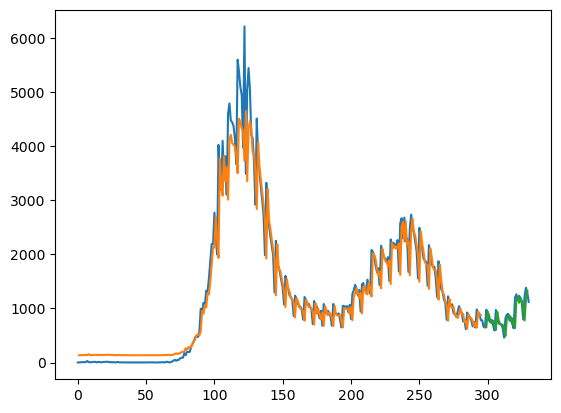

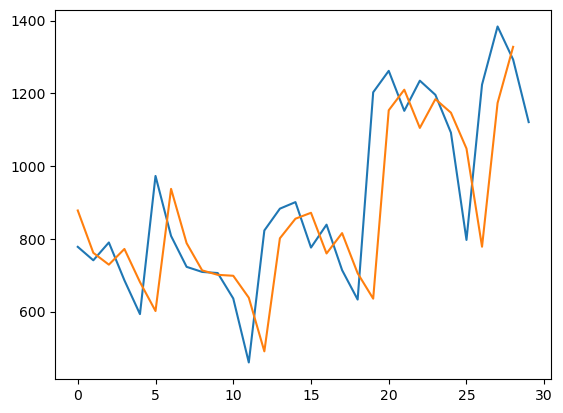

In [6]:
tf.random.set_seed(7)

# 2/3 資料為訓練資料， 1/3 資料為測試資料
train_size = int(len(dataset) * 0.9)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 產生 (X, Y) 資料集, Y 是下一期的確診數(reshape into X=t and Y=t+1)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# 建立及訓練 GRU 模型
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, look_back)),
    Dense(4, activation='elu'),
    SimpleRNN(64,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='elu'),
    Dense(4, activation='elu'),
    LSTM(64,dropout=0.1,return_sequences=True, activation='tanh'),
    Dense(1, activation='tanh')
])

#model.compile(loss='categorical_crossentropy', optimizer=opt)
#opt = keras.optimizers.Adam(learning_rate=0.0001)
sgd = optimizers.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd ,metrics=['mse'])


model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="changhua_rnn+lstm_5000_4.keras",
    save_weights_only=True,
    monitor='val_mse',
    mode='min',
    save_best_only=True)

model.summary()
history = model.fit(trainX, trainY,validation_data=(testX, testY), epochs=5000, batch_size=1, verbose=1,callbacks=[model_checkpoint_callback])
model.save('changhua_rnn+lstm_5000_4.h5')
# 預測
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict=trainPredict.reshape(-1, 1)
testPredict=testPredict.reshape(-1, 1)
# 回復預測資料值為原始數據的規模
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate 均方根誤差(root mean squared error)
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

#model = keras.models.load_model("jena_lstm.keras")
#print(f"Test MAE: {model.evaluate(testPredict)[1]:.2f}")

# 畫訓練資料趨勢圖
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 畫測試資料趨勢圖
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


# 畫原始資料趨勢圖
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.savefig('changhua_rnn+lstm_5000_plot_4.png') 
plt.show()

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
days=len(testPredictPlot)
plt.plot(scaler.inverse_transform(dataset[days-30:,:]))
plt.plot(testPredictPlot[days-30:,:])
plt.savefig("changhua_rnn+lstm_5000_predict&real_4.png")
plt.show()